## Household rental price analysis and prediction (partial) in Dhaka's various place.

Author: Abul Hasnat

Dataset (C) BDProperty

Household rental price analysis and prediction in Dhaka's various places involves a comprehensive examination of the rental real estate market in the city to understand the trends and factors influencing housing costs. This partial analysis focuses on specific aspects of the rental landscape in different neighborhoods within Dhaka. This analysis also include analysis of rental price in Chittagong's various place.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:


file= '/content/drive/MyDrive/property_listing_data_in_Bangladesh.csv'
df = pd.read_csv(file)

In [ ]:
df.head(5)

,title,beds,bath,area,adress,type,purpose,flooPlan,url,lastUpdated,price
0,Eminent Apartment Of 2200 Sq Ft Is Vacant For ...,3,4,"2,200 sqft","Block A, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,"August 13, 2022",50 Thousand
1,"Apartment Ready To Rent In South Khulshi, Near...",3,4,"1,400 sqft","South Khulshi, Khulshi, Chattogram",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/44...,https://www.bproperty.com/en/property/details-...,"January 25, 2022",30 Thousand
2,"Smartly priced 1950 SQ FT apartment, that you ...",3,4,"1,950 sqft","Block F, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/11...,https://www.bproperty.com/en/property/details-...,"February 22, 2023",30 Thousand
3,2000 Sq Ft Residential Apartment Is Up For Ren...,3,3,"2,000 sqft","Sector 9, Uttara, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/14...,https://www.bproperty.com/en/property/details-...,"October 28, 2021",35 Thousand
4,Strongly Structured This 1650 Sq. ft Apartment...,3,4,"1,650 sqft","Block I, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,"February 19, 2023",25 Thousand


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7557 entries, 0 to 7556
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        7557 non-null   object
 1   beds         7557 non-null   object
 2   bath         7557 non-null   object
 3   area         7557 non-null   object
 4   adress       7557 non-null   object
 5   type         7557 non-null   object
 6   purpose      7557 non-null   object
 7   flooPlan     7556 non-null   object
 8   url          7557 non-null   object
 9   lastUpdated  7557 non-null   object
 10  price        7557 non-null   object
dtypes: object(11)
memory usage: 649.6+ KB


### Data cleaning begin

In [ ]:
drp=['title','flooPlan','url','lastUpdated','purpose']
df=df.drop(drp, axis=1)

In [ ]:
df.isnull().sum()

beds      0
bath      0
area      0
adress    0
type      0
price     0
dtype: int64

In [ ]:
df.head(5)

,beds,bath,area,adress,type,price
0,3,4,"2,200 sqft","Block A, Bashundhara R-A, Dhaka",Apartment,50 Thousand
1,3,4,"1,400 sqft","South Khulshi, Khulshi, Chattogram",Apartment,30 Thousand
2,3,4,"1,950 sqft","Block F, Bashundhara R-A, Dhaka",Apartment,30 Thousand
3,3,3,"2,000 sqft","Sector 9, Uttara, Dhaka",Apartment,35 Thousand
4,3,4,"1,650 sqft","Block I, Bashundhara R-A, Dhaka",Apartment,25 Thousand


#### Type convert

In [ ]:
df['area'] = df['area'].str.replace(" sqft", "").str.replace(",", "").astype(int)
df['beds'] = df['beds'].str.replace(" Bed", "").astype(int)
df['bath'] = df['bath'].str.replace(" Bath", "").astype(int)

In [ ]:
thousand = [" Thousand", 1000]
lakh = [" Lakh", 100_000]

for i in range(df.loc[:, 'price'].shape[0]):
    if " Thousand" in df.at[i, 'price']:
        df.at[i, 'price'] = float(df.at[i, 'price'].replace(thousand[0], "")) * thousand[1]

    elif " Lakh" in df.at[i, 'price']:
        df.at[i, 'price'] = float(df.at[i, 'price'].replace(lakh[0], "")) * lakh[1]

df.loc[:, 'price'] = df.loc[:, 'price'].astype(float)

<ipython-input-6-fc4f94f8c7c3>:11: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'price'] = df.loc[:, 'price'].astype(float)


In [ ]:
dfc= df.copy()
dfc[['Sector/Block','Region','Town','City']]= 'null'

In [ ]:
block_list = []
sector_list = []
for i, s in enumerate(dfc['adress']):
    string_list = s.split(", ")
    if len(string_list)>2:
      dfc.at[i, 'City']=string_list.pop()
      dfc.at[i, 'Town']=string_list.pop()

      if len(string_list)>2:
        dfc.at[i, 'Region']=string_list.pop()

        for string in string_list:

          if 'Block' in string_list:
            block_list.append(string)

          elif ("Sector" or 'Section') in string:
            sector_list.append(string)
            break

        if sector_list and block_list:
          dfc.at[i, 'Sector/Block']= sector_list.pop()

        elif sector_list:
          dfc.at[i, 'Sector/Block']=sector_list.pop()

        elif block_list:
          dfc.at[i, "Sector/Block"]=block_list.pop()

        else:
          dfc.at[i, 'Sector/Block']="No info."

      elif    len(string_list)==2:

        for  string in string_list:
          if 'Block' in string:
            block_list.append(string_list.pop(string_list.index(string)))

          elif ('Sector' or 'Section') in string:
            sector_list.append(string_list.pop(string_list.index(string)))
            break

        if sector_list and block_list:
          dfc.at[i, 'Sector/Block']=sector_list.pop()
          dfc.at[i, 'Region']=dfc.at[i, 'Town']

        elif sector_list:
          dfc.at[i, 'Sector/Block']=sector_list.pop()
          dfc.at[i, 'Region'] = string_list.pop()
        elif block_list:
          dfc.at[i, 'Sector/Block'] = block_list.pop()
          dfc.at[i, 'Region'] = string_list.pop()

        else:
          dfc.at[i, 'Region'] = string_list.pop()
          dfc.at[i, 'Sector/Block'] = "No info."

      else:

        for string in string_list:
          if 'Block' in string:
            block_list.append(string)

          elif ('Sector' or 'Section') in string:
            sector_list.append(string)
            break

        if sector_list:
          dfc.at[i, "Sector/Block"]= sector_list.pop()
          dfc.at[i, 'Region']= dfc.at[i, 'Town']

        elif block_list:
          dfc.at[i, 'Sector/Block']= block_list.pop()
          dfc.at[i, 'Region']= dfc.at[i,'Town']

        else:
          dfc.at[i, 'Region'] = string_list.pop()
          dfc.at[i, 'Sector/Block'] = "No info."

    elif len(string_list)==2:
      dfc.at[i, 'City'] = string_list.pop()
      for string in string_list:
        if "Block" in string:
          block_list.append(string)
        elif ("Sector" or "Section") in string:
          sector_list.append(string)
          break

      if sector_list:
            dfc.loc[i, 'Sector/Block'] = sector_list.pop()
            dfc.loc[i, ['Town', 'Region']] = dfc.at[i, 'City']
      elif block_list:
          dfc.loc[i, 'Sector/Block'] = block_list.pop()
          dfc.loc[i, ['Town', 'Region']] = dfc.at[i, 'City']
      else:
          dfc.at[i, 'Sector/Block'] = "No info."
          dfc.loc[i, ['Town', 'Region']] = string_list.pop()

    else:
        dfc.loc[i, ['City', 'Town','Region']] = string_list.pop()
        dfc.at[i, 'Sector/Block'] = "No info."









In [ ]:
dfc['TotalRooms'] = dfc['beds'] + dfc['bath']

In [ ]:
dfc.head(5)

,beds,bath,area,adress,type,price,Sector/Block,Region,Town,City,TotalRooms
0,3,4,2200,"Block A, Bashundhara R-A, Dhaka",Apartment,50000.0,Block A,Bashundhara R-A,Bashundhara R-A,Dhaka,7
1,3,4,1400,"South Khulshi, Khulshi, Chattogram",Apartment,30000.0,No info.,South Khulshi,Khulshi,Chattogram,7
2,3,4,1950,"Block F, Bashundhara R-A, Dhaka",Apartment,30000.0,Block F,Bashundhara R-A,Bashundhara R-A,Dhaka,7
3,3,3,2000,"Sector 9, Uttara, Dhaka",Apartment,35000.0,Sector 9,Uttara,Uttara,Dhaka,6
4,3,4,1650,"Block I, Bashundhara R-A, Dhaka",Apartment,25000.0,Block I,Bashundhara R-A,Bashundhara R-A,Dhaka,7


In [ ]:
dfc.to_csv('bdpropertydataclean.csv', index=False)

In [ ]:
filepath='/content/drive/MyDrive/propertyclenaed.csv'

In [ ]:
with open('bdpropertydataclean.csv', 'rb') as file:
    data = file.read()

In [ ]:
with open(filepath, 'wb') as file:
    file.write(data)

#### Create a workable dataset

In [ ]:
drp='adress'
dfc= dfc.drop(drp, axis=1)

In [ ]:

dfc.rename(columns={'beds': 'Beds', 'bath': 'Baths', 'area': 'Area_sqft', 'Sector/Block': 'sector_or_block',
                          'type': 'Type', 'price': 'Price_BDT'}, inplace=True)


In [ ]:
dfc.head(5)

,Beds,Baths,Area_sqft,Type,Price_BDT,sector_or_block,Region,Town,City,TotalRooms
0,3,4,2200,Apartment,50000.0,Block A,Bashundhara R-A,Bashundhara R-A,Dhaka,7
1,3,4,1400,Apartment,30000.0,No info.,South Khulshi,Khulshi,Chattogram,7
2,3,4,1950,Apartment,30000.0,Block F,Bashundhara R-A,Bashundhara R-A,Dhaka,7
3,3,3,2000,Apartment,35000.0,Sector 9,Uttara,Uttara,Dhaka,6
4,3,4,1650,Apartment,25000.0,Block I,Bashundhara R-A,Bashundhara R-A,Dhaka,7


#### Data Analysis



In [ ]:
dfc.describe().T

,count,mean,std,min,25%,50%,75%,max
Beds,7557.0,2.754400,0.976034,1.0,2.0,3.0,3.0,36.0
Baths,7557.0,2.693662,0.900990,1.0,2.0,3.0,3.0,10.0
Area_sqft,7557.0,1372.025010,956.756264,300.0,900.0,1200.0,1550.0,31500.0
Price_BDT,7557.0,34079.026069,64711.608079,5500.0,15000.0,19000.0,30000.0,2000000.0
TotalRooms,7557.0,5.448061,1.739099,2.0,4.0,6.0,6.0,46.0


Distribution of values

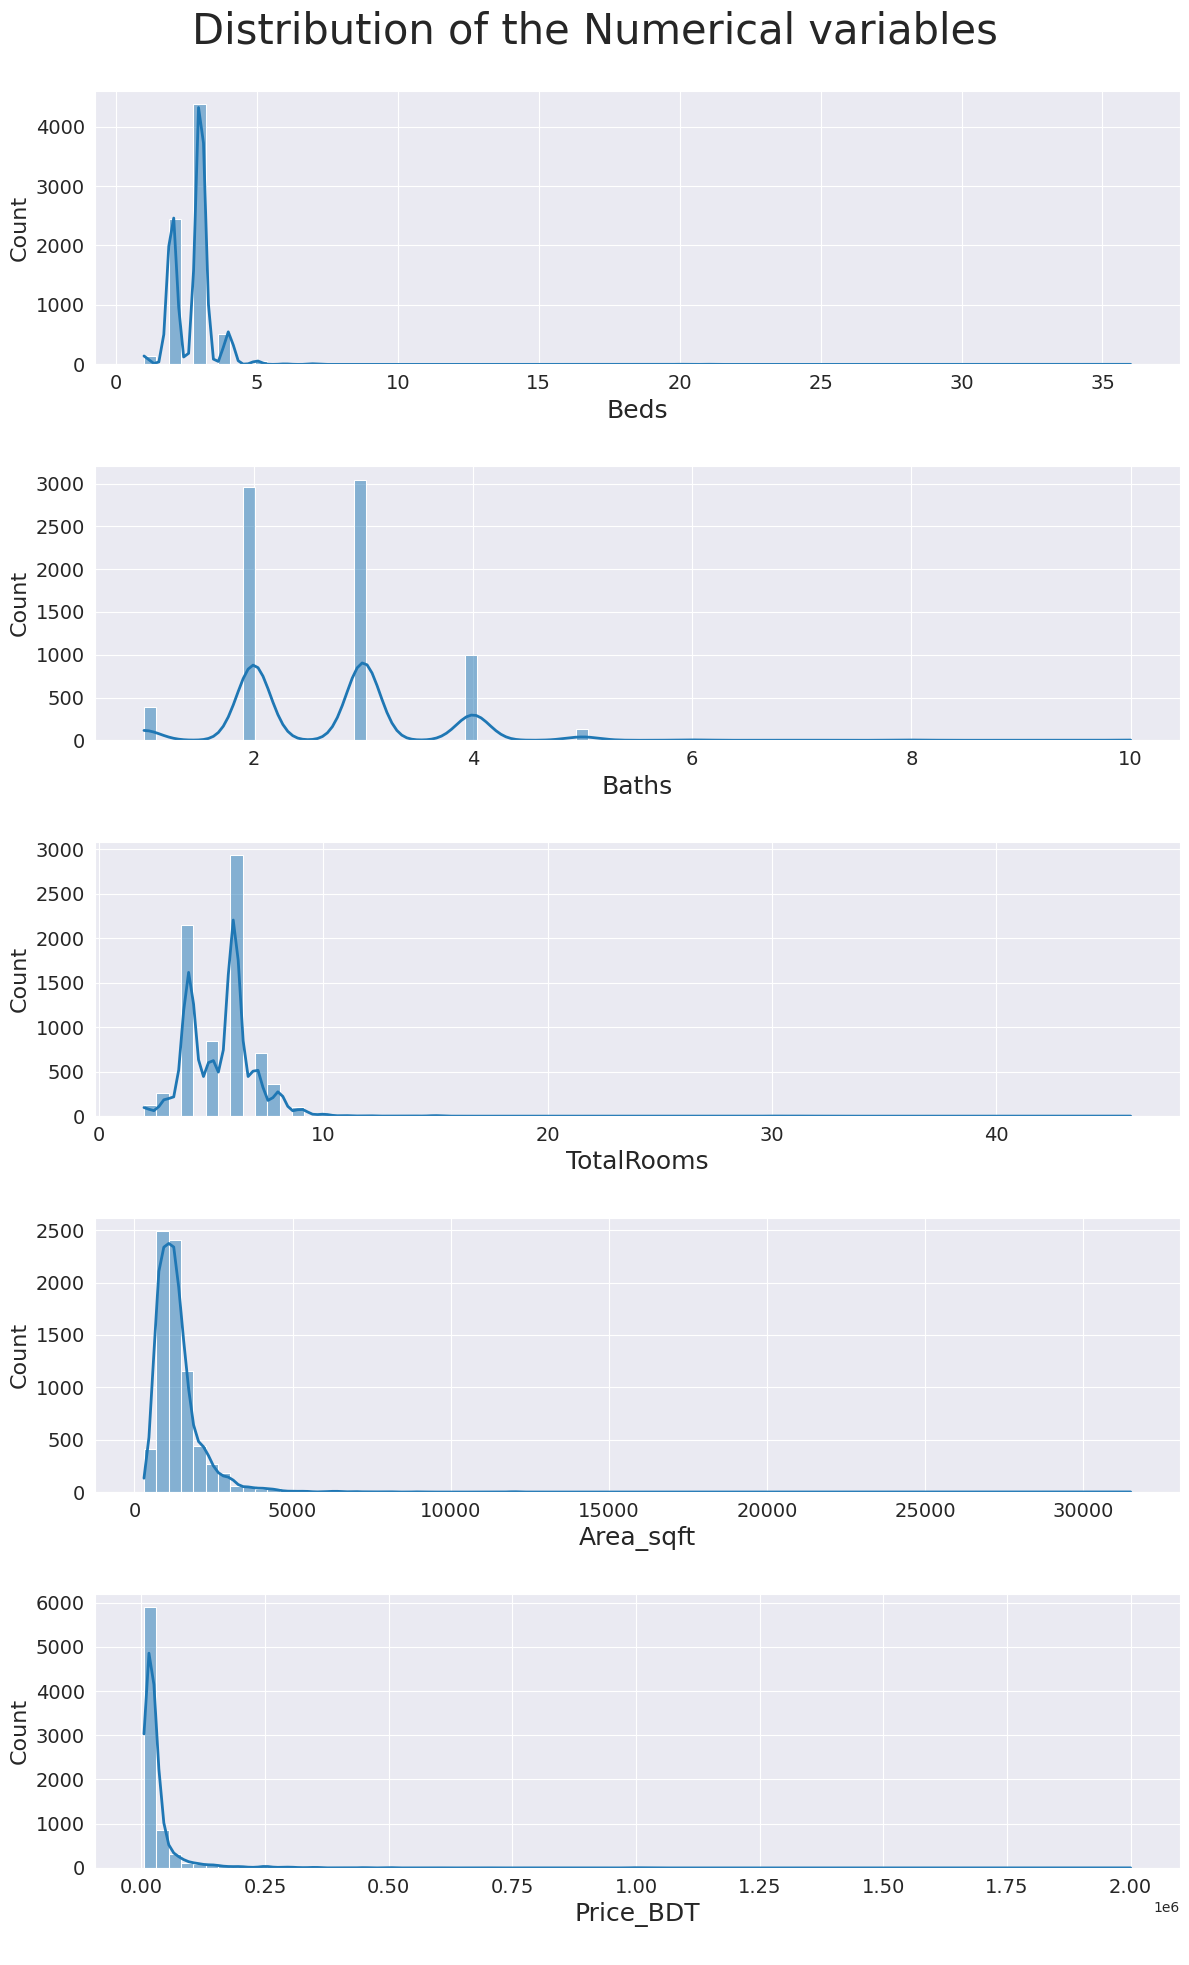

In [ ]:
num=['Beds', 'Baths', 'TotalRooms', 'Area_sqft', 'Price_BDT']
n_rows, n_cols = 5, 1

with sns.axes_style("darkgrid"):
    figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 20))
    figure.suptitle("Distribution of the Numerical variables\n", fontsize=30)

    for i, col in enumerate(num):


        fig = sns.histplot(data=dfc,
                        x=col,
                        kde=True,
                        ax=axes[i],
                        line_kws={"linewidth": 2,},
                        bins=80,
                        )

        axes[i].set_xlabel(col + "\n", fontsize=18)
        axes[i].set_ylabel('Count', fontsize=16)

        axes[i].tick_params(axis='x', labelsize=14)

        axes[i].tick_params(axis='y', labelsize=14)

# axes[0].set_ylabel('Count\n', fontsize=18)
plt.tight_layout()
plt.show()

In [ ]:
dk = dfc[dfc['City'] == 'Dhaka']
cto=dfc[dfc['City'] == 'Chattogram']

In [ ]:
dk.describe().T

,count,mean,std,min,25%,50%,75%,max
Beds,5332.0,2.817142,1.089566,1.0,2.0,3.0,3.0,36.0
Baths,5332.0,2.773631,0.937532,1.0,2.0,3.0,3.0,10.0
Area_sqft,5332.0,1440.496812,1093.814996,300.0,900.0,1220.5,1654.0,31500.0
Price_BDT,5332.0,39909.534884,75682.747733,7000.0,15000.0,20000.0,35000.0,2000000.0
TotalRooms,5332.0,5.590773,1.875964,2.0,4.0,6.0,6.0,46.0


In [ ]:
cto.describe().T

,count,mean,std,min,25%,50%,75%,max
Beds,2225.0,2.604045,0.599071,1.0,2.0,3.0,3.0,7.0
Baths,2225.0,2.502022,0.773970,1.0,2.0,2.0,3.0,8.0
Area_sqft,2225.0,1207.938876,451.591215,400.0,900.0,1150.0,1400.0,7000.0
Price_BDT,2225.0,20106.768539,14850.783121,5500.0,12000.0,16000.0,22000.0,300000.0
TotalRooms,2225.0,5.106067,1.293830,2.0,4.0,5.0,6.0,15.0


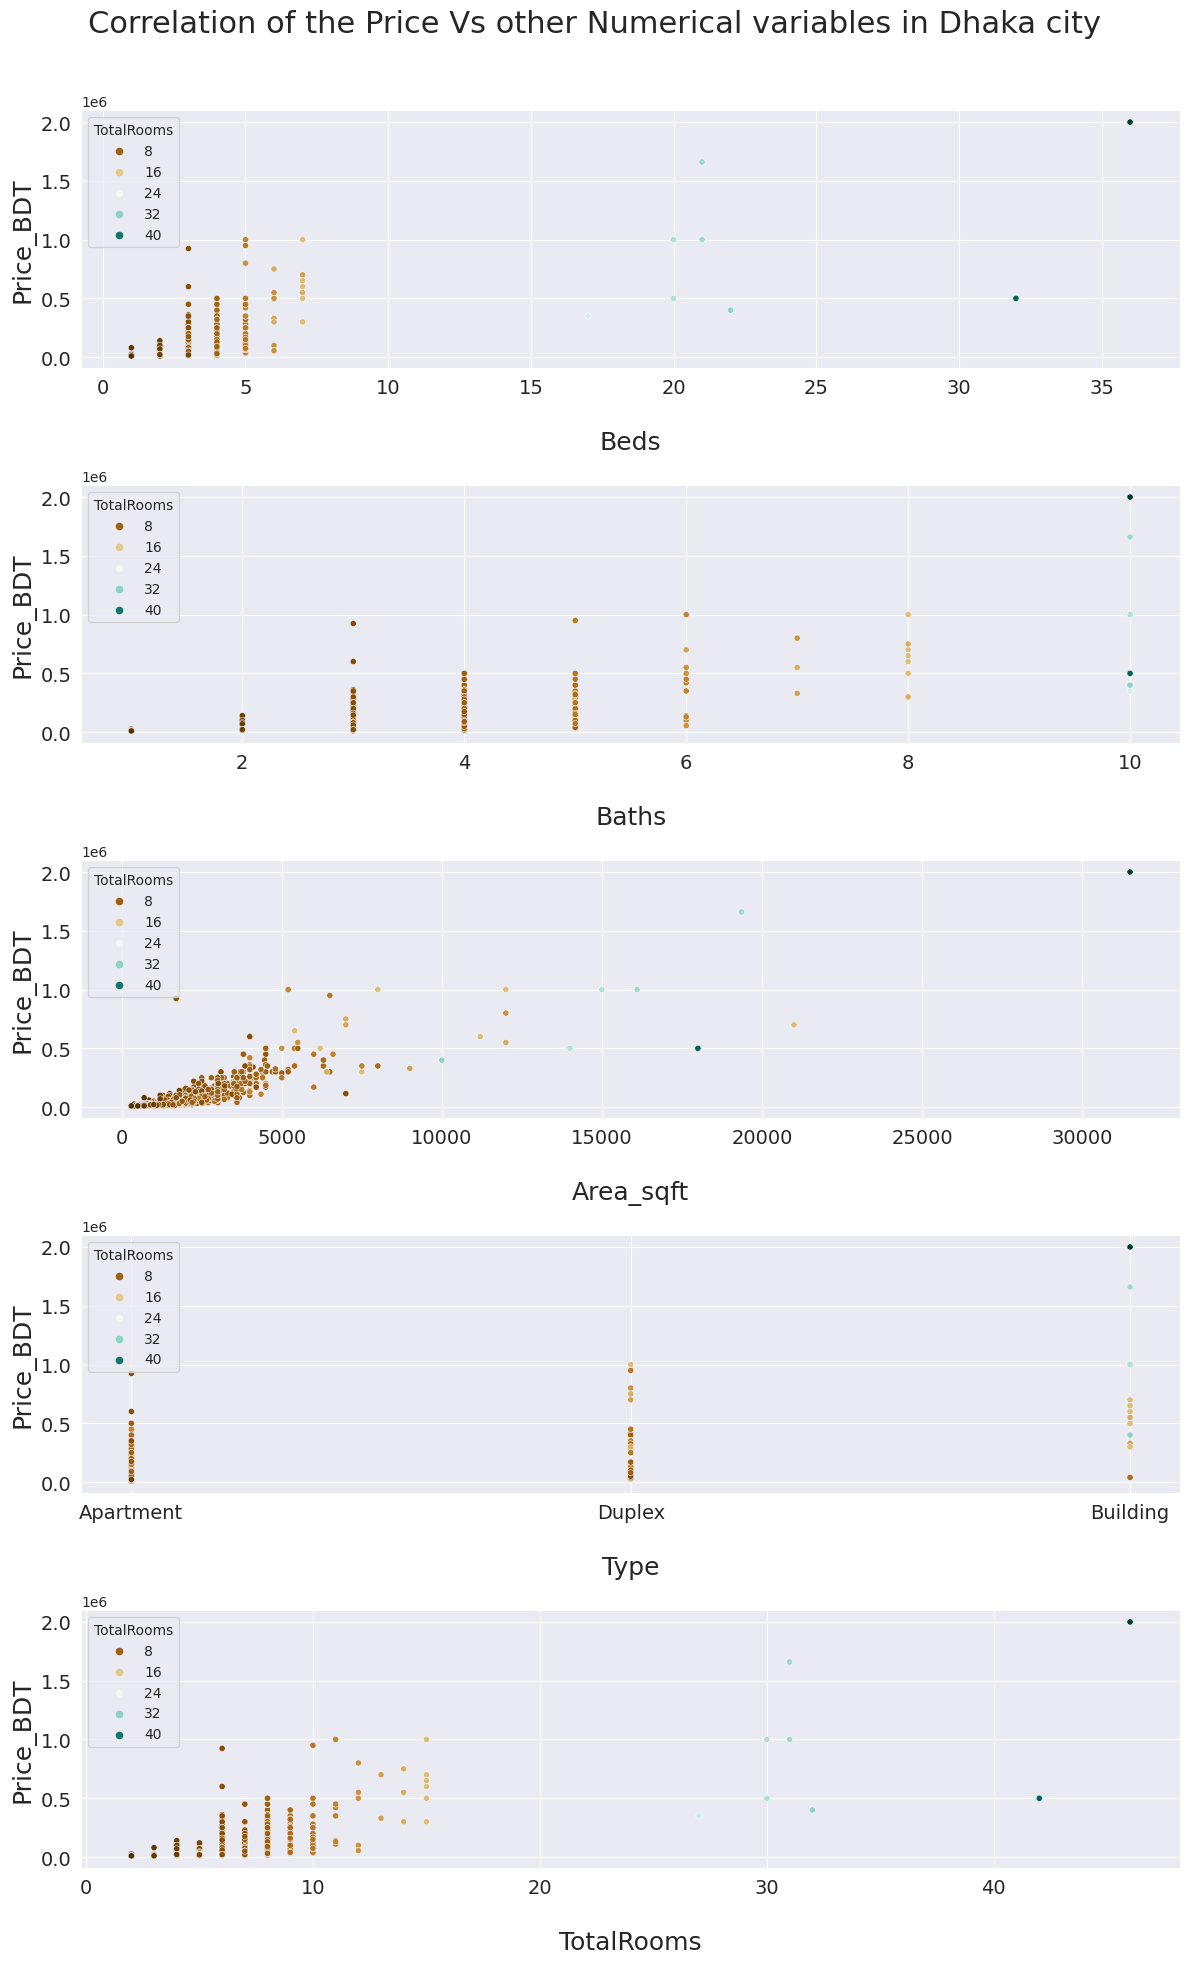

In [ ]:
neu= ['Beds','Baths','Area_sqft','Type','TotalRooms']
n_rows, n_cols = 5, 1

with sns.axes_style('darkgrid'):
    figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 20))
    figure.suptitle("Correlation of the Price Vs other Numerical variables in Dhaka city\n\n",
                    fontsize=22)

    for i, col in enumerate(neu):
        # j, i = idx // 2, idx % 2

        fig = sns.scatterplot(data=dk,
                            x=col,
                            y='Price_BDT',
                            palette='BrBG',
                            size='TotalRooms',
                            hue='TotalRooms',
                            sizes=(20,20),
                            ax=axes[i]
                            )
        axes[i].set_xlabel("\n" + col, fontsize=18)
        axes[i].set_ylabel("Price_BDT", fontsize=18)
        # axes[i].set_xticklabels(axes[j, i].get_xticks(),fontsize=14)
        axes[i].tick_params(axis='x', labelsize=14)
        # axes[i].set_yticklabels(axes[j, i].get_yticks(),fontsize=14)
        axes[i].tick_params(axis='y', labelsize=14)

# axes[0].set_ylabel('Count\n', fontsize=18)
plt.tight_layout()
plt.show()

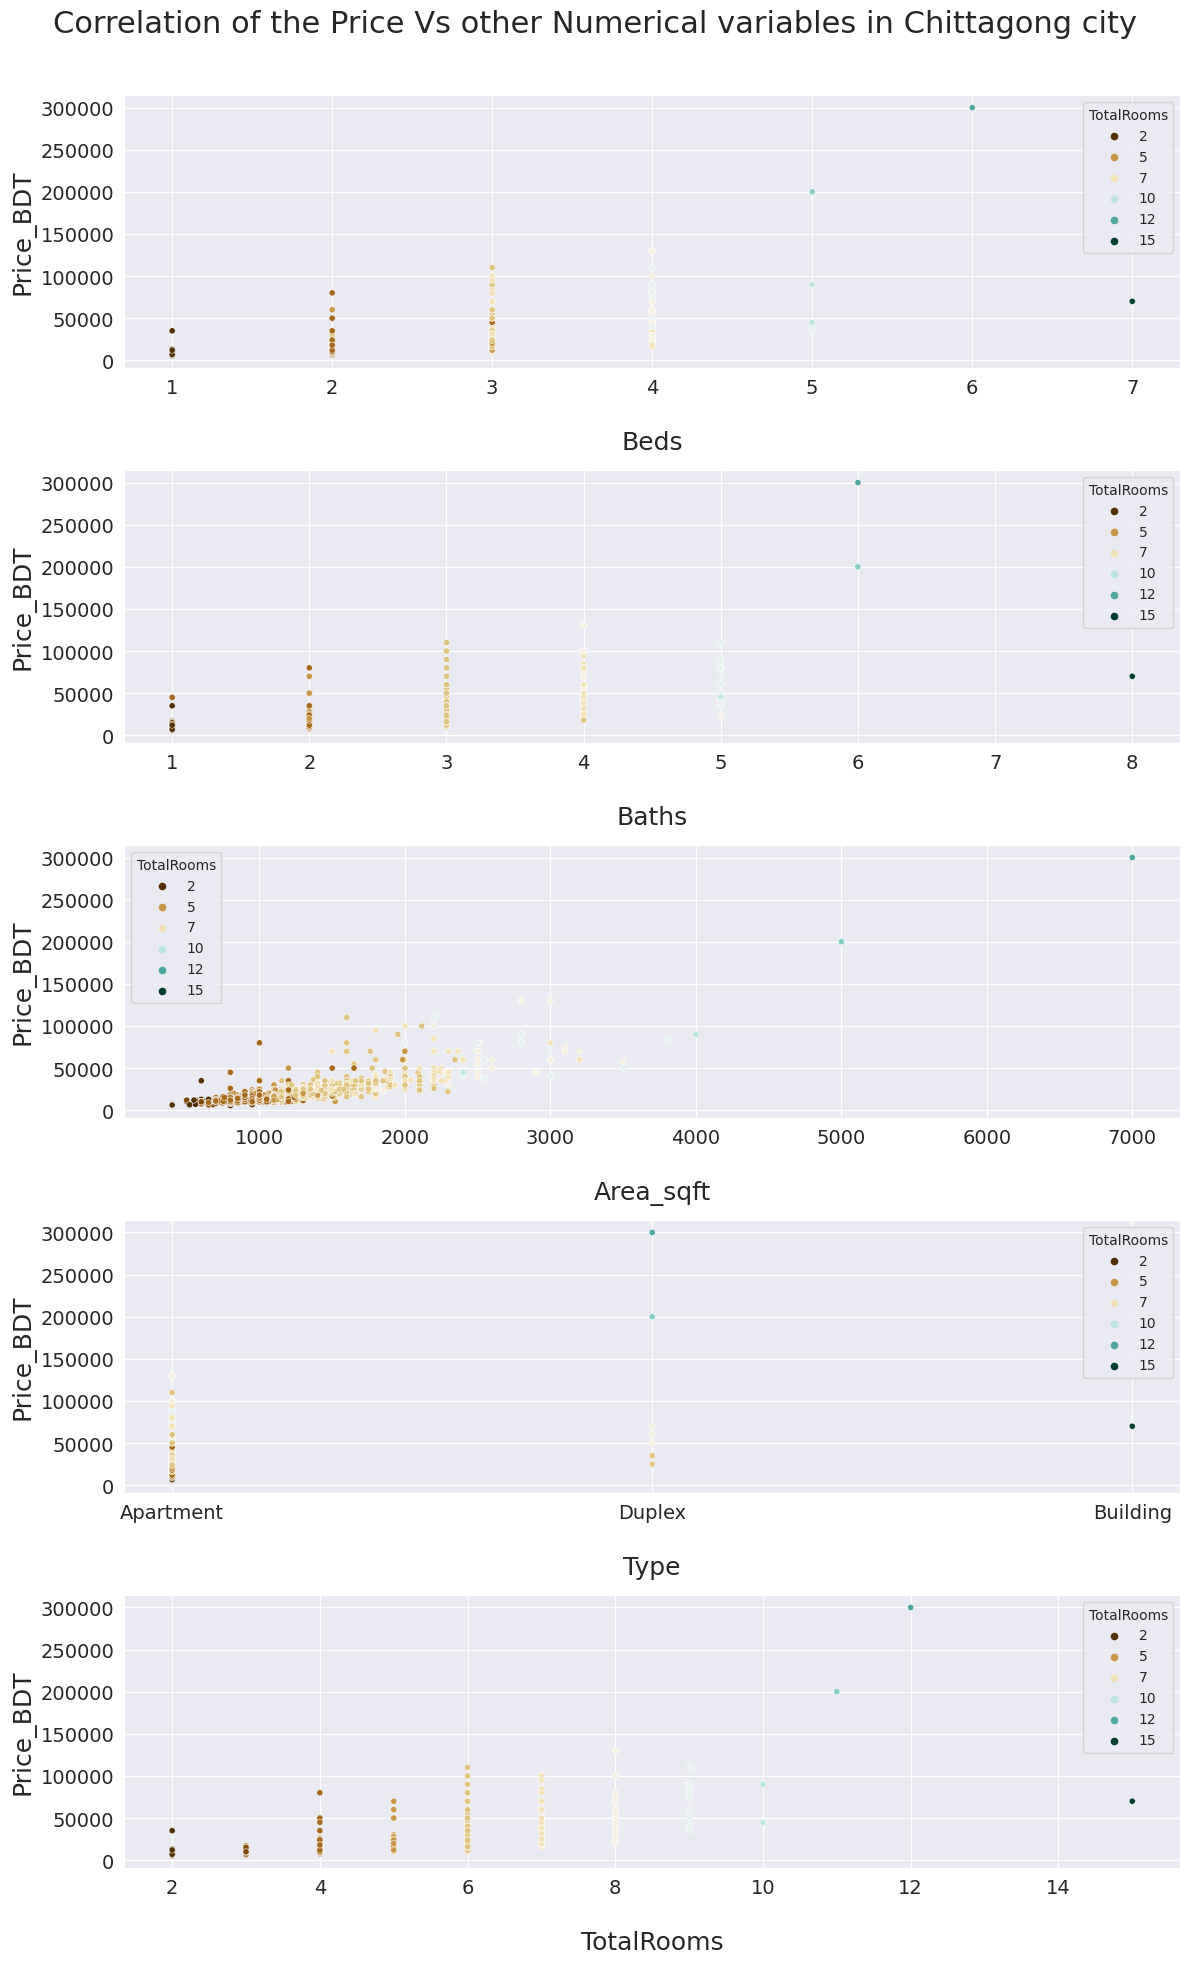

In [ ]:
beu= ['Beds','Baths','Area_sqft','Type','TotalRooms']
n_rows, n_cols = 5, 1

with sns.axes_style('darkgrid'):
    figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 20))
    figure.suptitle("Correlation of the Price Vs other Numerical variables in Chittagong city\n\n",
                    fontsize=22)

    for i, col in enumerate(beu):
        # j, i = idx // 2, idx % 2

        fig = sns.scatterplot(data=cto,
                            x=col,
                            y='Price_BDT',
                            palette='BrBG',
                            size='TotalRooms',
                            hue='TotalRooms',
                            sizes=(20,20),
                            ax=axes[i]
                            )
        axes[i].set_xlabel("\n" + col, fontsize=18)
        axes[i].set_ylabel("Price_BDT", fontsize=18)
        # axes[i].set_xticklabels(axes[j, i].get_xticks(),fontsize=14)
        axes[i].tick_params(axis='x', labelsize=14)
        # axes[i].set_yticklabels(axes[j, i].get_yticks(),fontsize=14)
        axes[i].tick_params(axis='y', labelsize=14)

# axes[0].set_ylabel('Count\n', fontsize=18)
plt.tight_layout()
plt.show()

In [ ]:
analysis_dhaka = pd.pivot_table(
    data=dk,
    index=['City', 'Type', 'Beds', 'Baths'],
    values='Price_BDT',
    aggfunc=['mean', 'median', 'count']
).sort_values(by=('count', 'Price_BDT'), ascending=False)

In [ ]:
round(analysis_dhaka, 2)

mean     median     count
                             Price_BDT  Price_BDT Price_BDT
City  Type      Beds Baths                                 
Dhaka Apartment 3    3        36354.40    25000.0      2081
                2    2        15826.83    15000.0      1373
                3    2        17811.01    16000.0       545
                     4        47673.45    35000.0       516
                4    4       113598.07    75000.0       311
                2    1        11243.23    10500.0       155
                1    1        11518.48    10000.0        92
                4    5       152983.61   110000.0        61
                     3        40169.49    35000.0        59
                2    3        34035.71    22000.0        28
                5    5       159473.68   100000.0        19
                     4        74583.33    70000.0        12
                3    5        62200.00    55000.0        10
      Duplex    5    5       335000.00   265000.0         8
      Building  7    8       625000.00   625000.0         6
      Duplex    4    5       205000.00   212500.0         6
                     4       160000.00    90000.0         5
                5    6       230000.00   140000.0         5
                3    3        63750.00    60000.0         4
      Apartment 5    3       120000.00   120000.0         3
                1    2        38666.67    21000.0         3
      Building  21   10     1330000.00  1330000.0         2
                20   10      750000.00   750000.0         2
      Duplex    3    4        60000.00    60000.0         2
                6    6        77500.00    77500.0         2
      Building  4    5       170000.00   170000.0         2
      Duplex    6    8       525000.00   525000.0         2
      Apartment 4    2        20000.00    20000.0         2
      Duplex    5    7       800000.00   800000.0         1
                     4       320000.00   320000.0         1
                4    3        80000.00    80000.0         1
                7    6       700000.00   700000.0         1
      Building  7    7       550000.00   550000.0         1
      Duplex    3    5        38000.00    38000.0         1
      Building  36   10     2000000.00  2000000.0         1
                32   10      500000.00   500000.0         1
                22   10      400000.00   400000.0         1
                17   10      350000.00   350000.0         1
                6    7       330000.00   330000.0         1
                     6       550000.00   550000.0         1
                5    6      1000000.00  1000000.0         1
      Apartment 6    6       500000.00   500000.0         1
                5    6       450000.00   450000.0         1
      Duplex    7    8      1000000.00  1000000.0         1

In [ ]:
analysis_chitt = pd.pivot_table(
    data=cto,
    index=['City', 'Type', 'Beds', 'Baths'],
    values='Price_BDT',
    aggfunc=['mean', 'median', 'count']
).sort_values(by=('count', 'Price_BDT'), ascending=False)

round(analysis_chitt, 2)

mean    median     count
                                 Price_BDT Price_BDT Price_BDT
City       Type      Beds Baths                               
Chattogram Apartment 3    3       23097.68   20000.0       842
                     2    2       13222.84   12000.0       771
                     3    2       16304.56   15500.0       263
                          4       37352.17   32000.0       115
                     2    1       10833.66   10500.0       101
                     1    1       10700.00   10000.0        36
                     4    4       59035.71   56500.0        28
                          5       73750.00   80000.0        20
                          3       27875.00   25000.0        16
                     2    3       20269.23   17000.0        13
           Duplex    4    4       60000.00   60000.0         3
           Apartment 3    1       23666.67   16000.0         3
                     5    5       67500.00   67500.0         2
           Duplex    3    3       30000.00   30000.0         2
           Apartment 3    5       34500.00   34500.0         2
                     1    2       11500.00   11500.0         2
                     2    4       24000.00   24000.0         2
                     5    4       38000.00   38000.0         1
           Building  7    8       70000.00   70000.0         1
           Duplex    5    6      200000.00  200000.0         1
                     6    6      300000.00  300000.0         1

In [ ]:
# correlation
cordk=dk[['Beds','Baths','Area_sqft','Type','TotalRooms','Price_BDT']]
cordk.corr()



<ipython-input-28-a85675a7cf9c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cordk.corr()


,Beds,Baths,Area_sqft,TotalRooms,Price_BDT
Beds,1.000000,0.711265,0.816698,0.936265,0.639581
Baths,0.711265,1.000000,0.744277,0.912866,0.551696
Area_sqft,0.816698,0.744277,1.000000,0.846301,0.861182
TotalRooms,0.936265,0.912866,0.846301,1.000000,0.647186
Price_BDT,0.639581,0.551696,0.861182,0.647186,1.000000


In [ ]:
corctg=cto[['Beds','Baths','Area_sqft','Type','TotalRooms','Price_BDT']]
corctg.corr()

<ipython-input-29-e33126e82302>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corctg.corr()


,Beds,Baths,Area_sqft,TotalRooms,Price_BDT
Beds,1.000000,0.772199,0.741590,0.924952,0.554788
Baths,0.772199,1.000000,0.788176,0.955745,0.629591
Area_sqft,0.741590,0.788176,1.000000,0.814860,0.828717
TotalRooms,0.924952,0.955745,0.814860,1.000000,0.633500
Price_BDT,0.554788,0.629591,0.828717,0.633500,1.000000


<ipython-input-30-030ca6b92ba7>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fig = sns.heatmap(cordk.corr(), annot=True)


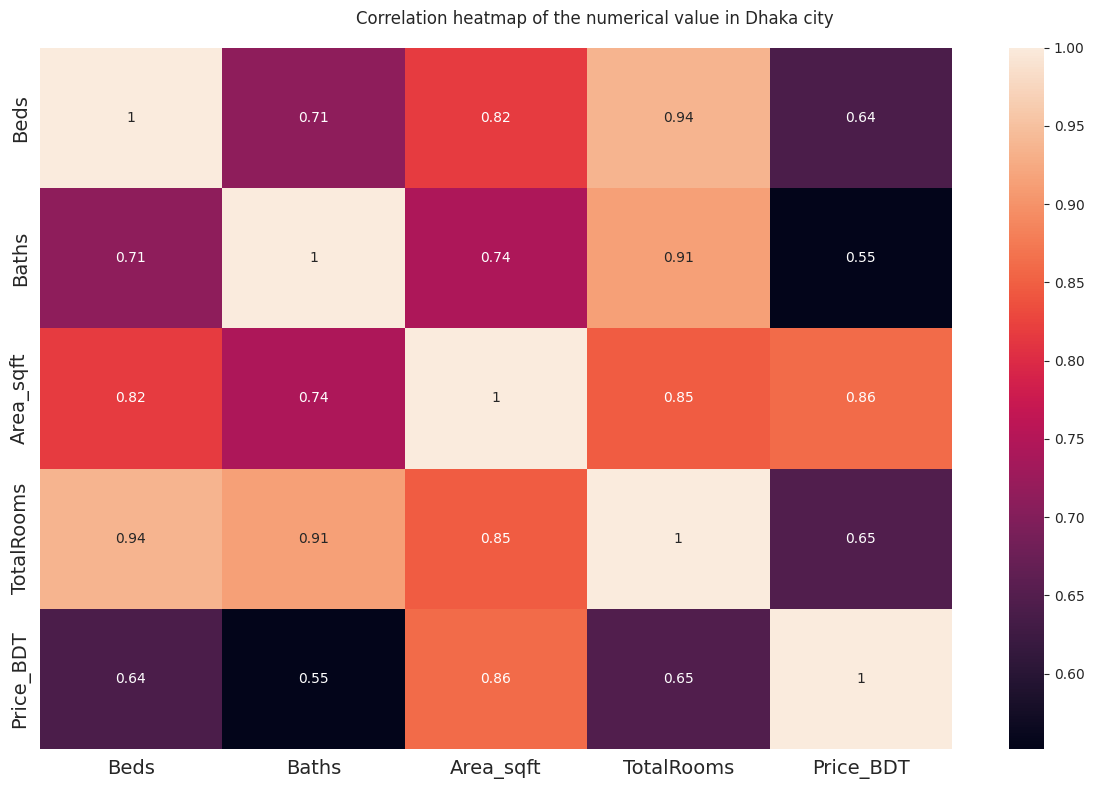

In [ ]:
with sns.axes_style('darkgrid'):
    figure, axes = plt.subplots(figsize=(12, 8))
    figure.suptitle("Correlation heatmap of the numerical value in Dhaka city")

    fig = sns.heatmap(cordk.corr(), annot=True)

    axes.tick_params(axis='x', labelsize=14)
    axes.tick_params(axis='y', labelsize=14)

plt.tight_layout()
plt.show()

<ipython-input-31-e1bbaec4a920>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fig = sns.heatmap(corctg.corr(), annot=True)


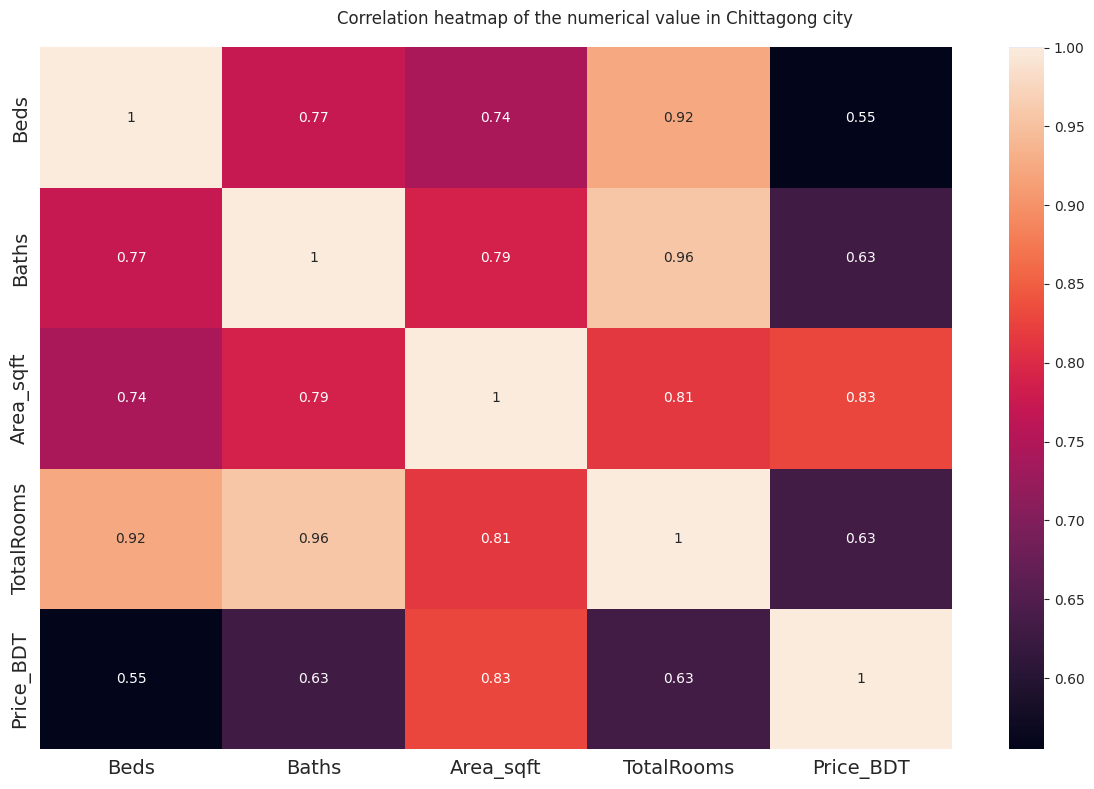

In [ ]:
with sns.axes_style('darkgrid'):
    figure, axes = plt.subplots(figsize=(12, 8))
    figure.suptitle("Correlation heatmap of the numerical value in Chittagong city")

    fig = sns.heatmap(corctg.corr(), annot=True)

    axes.tick_params(axis='x', labelsize=14)
    axes.tick_params(axis='y', labelsize=14)

plt.tight_layout()
plt.show()

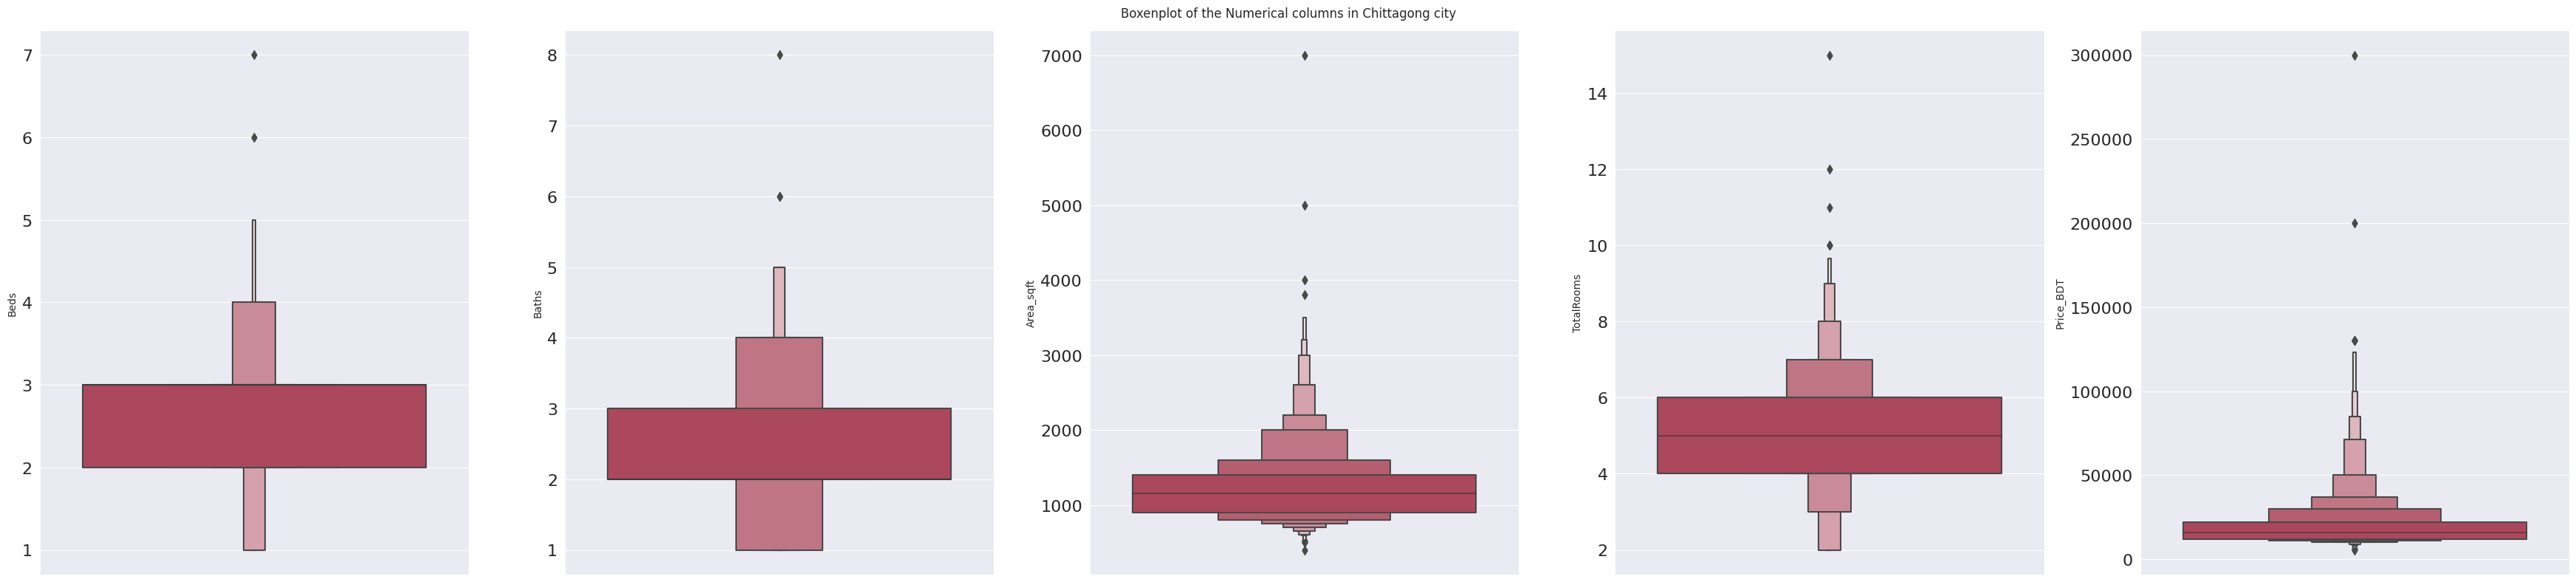

In [ ]:
with sns.axes_style('darkgrid'):
    n_rows, n_cols = (1, len(numericals))
    figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(35, 8))
    figure.suptitle("Boxenplot of the Numerical columns in Chittagong city")

    for i, col in enumerate(numericals):
        fig = sns.boxenplot(
            data=corctg,
            y=col,
            # x='Price',
            # hue='City',
            palette='inferno',
            ax=axes[i]
        )
        axes[i].set_ylabel(col)
        axes[i].tick_params(axis='y', labelsize=16)


plt.tight_layout()
plt.show()


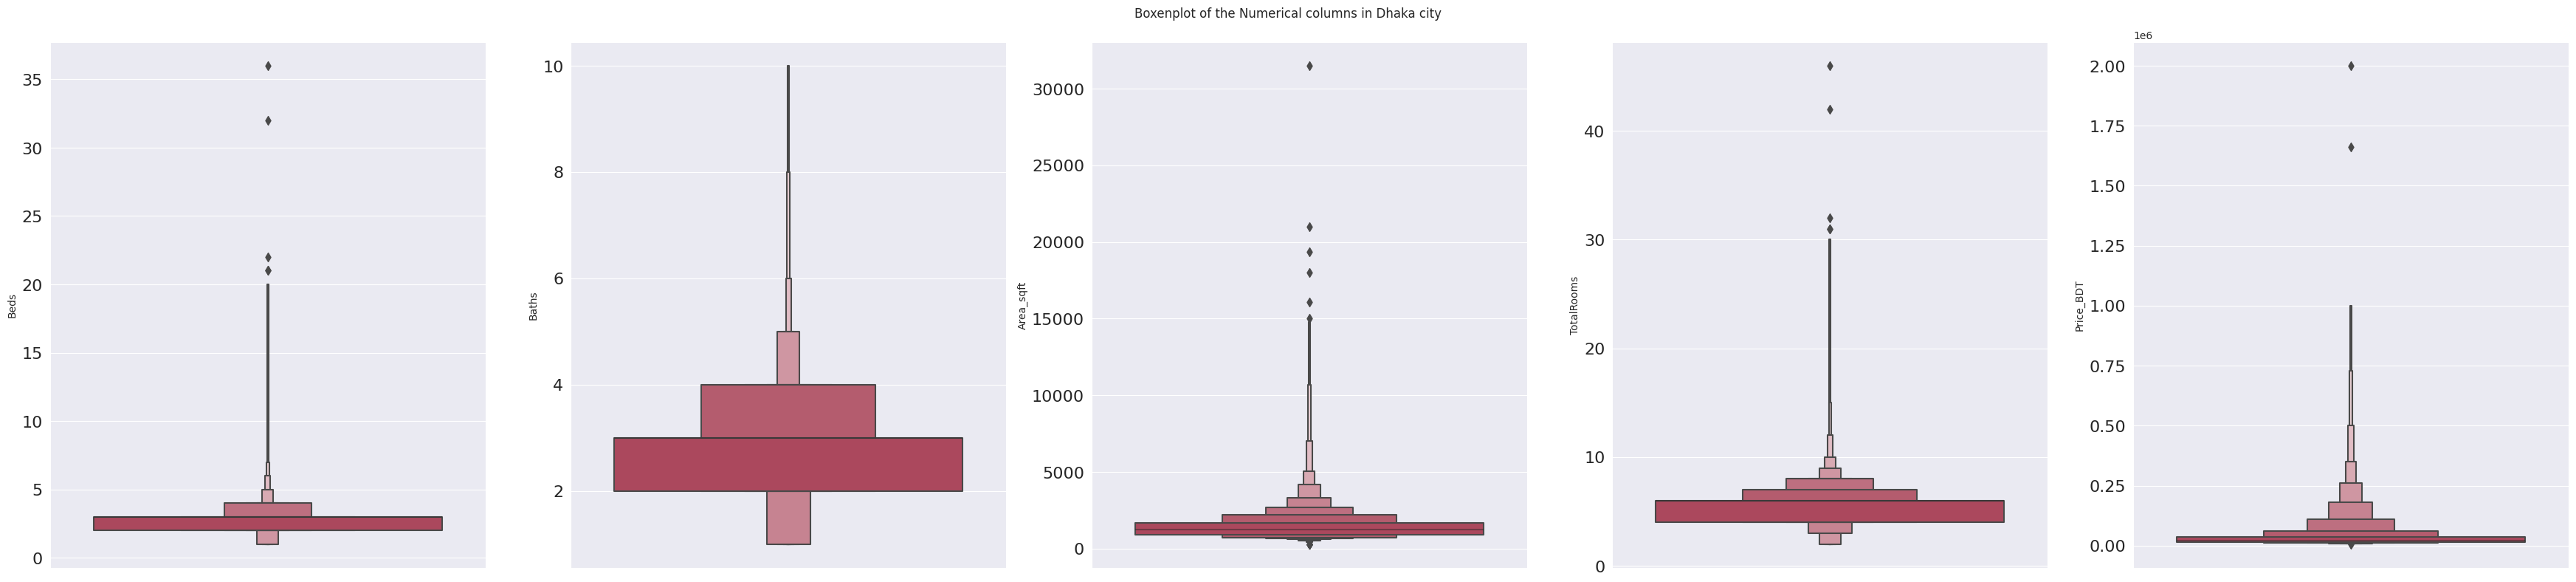

In [ ]:
numericals=['Beds','Baths','Area_sqft','TotalRooms','Price_BDT']
with sns.axes_style('darkgrid'):
    n_rows, n_cols = (1, len(numericals))
    figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(35, 8))
    figure.suptitle("Boxenplot of the Numerical columns in Dhaka city")

    for i, col in enumerate(numericals):
        fig = sns.boxenplot(
            data=cordk,
            y=col,
            # x='Price',
            # hue='City',
            palette='inferno',
            ax=axes[i]
        )
        axes[i].set_ylabel(col)
        axes[i].tick_params(axis='y', labelsize=16)


plt.tight_layout()
plt.show()


In [ ]:
sector_dk = pd.pivot_table(
    data=dk,
    index='Town',
    values='sector_or_block',
    aggfunc='count'
).sort_values(by='sector_or_block', ascending=False).reset_index().head(20)

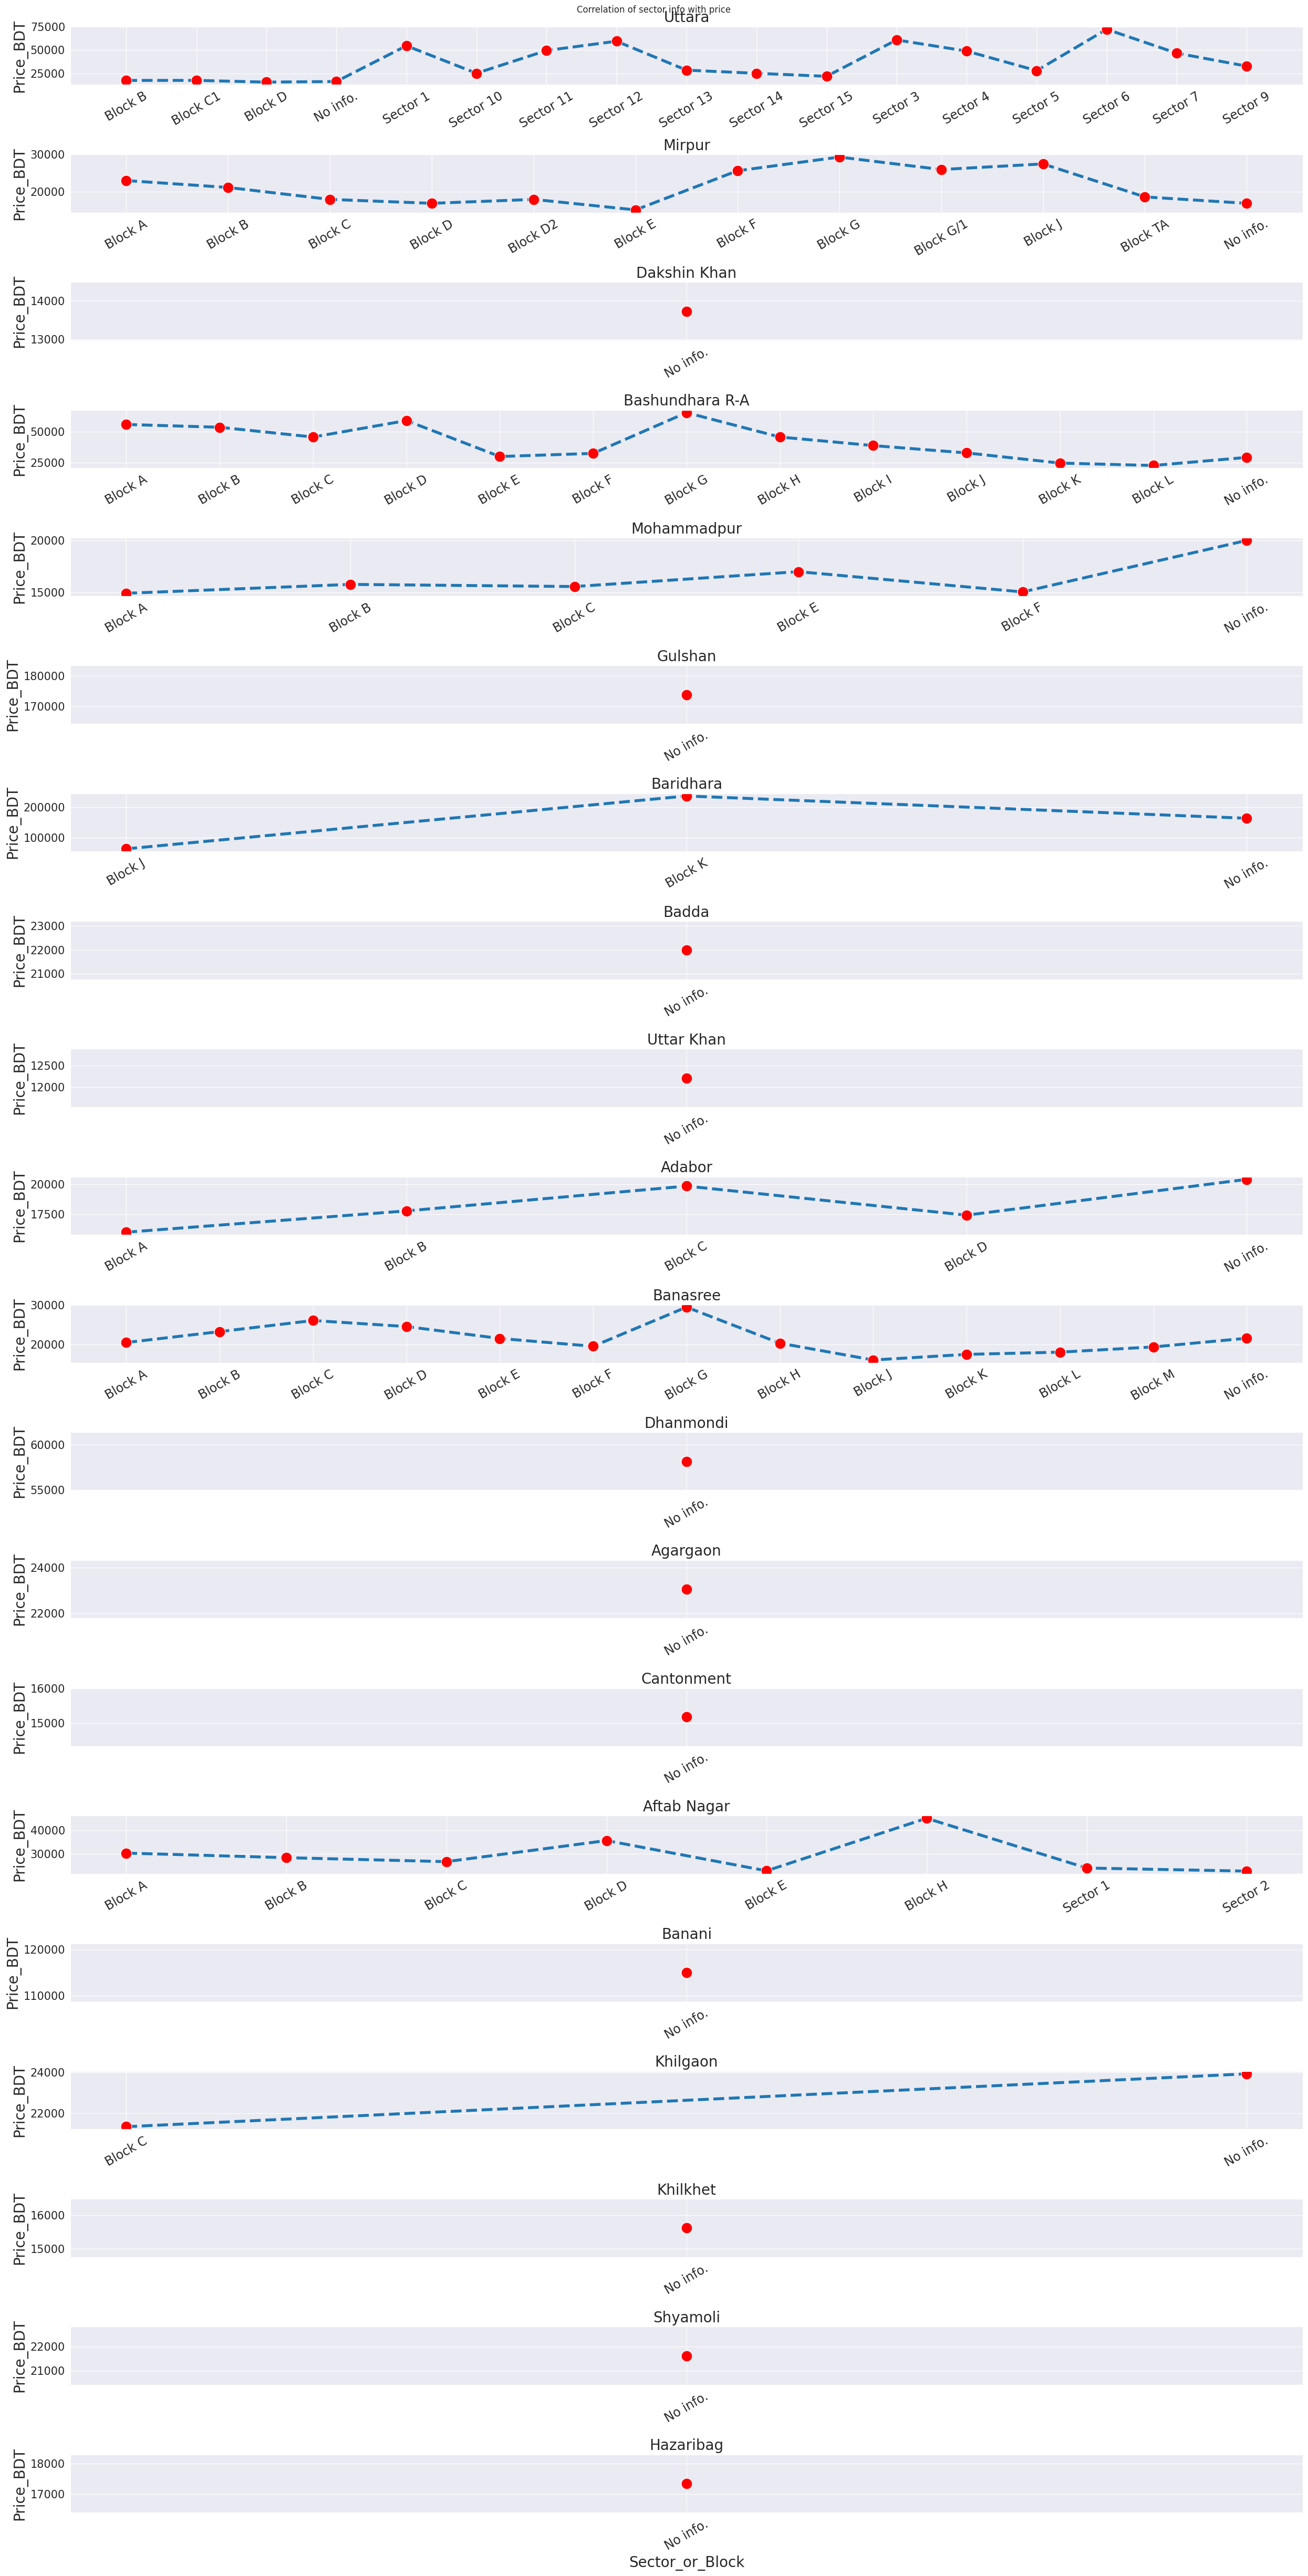

In [ ]:
with sns.axes_style('darkgrid'):
    n_rows, n_cols = (len(sector_dk), 1)
    figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(25, 50))
    figure.suptitle("Correlation of sector info with price\n\n\n")

    for i, col in enumerate(sector_dk['Town']):
        fig = sns.lineplot(
            data=pd.pivot_table(
                    data=dk[(dk['Town'] == col)],
                    index=['Town', 'sector_or_block'],
                    values='Price_BDT',
                    aggfunc='mean'
                    ).sort_values(by='sector_or_block', ascending=True).reset_index(),
                x='sector_or_block',
                y='Price_BDT',
                # size=12,
                lw=4,
                linestyle='--',
                markers=True,
                marker='o',
                markersize=15,
                markerfacecolor='red',
                ax=axes[i]
        )
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Price_BDT', fontsize=20)
        axes[i].set_title(col, fontsize=20)
        # axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=30, fontsize=17)
        axes[i].tick_params(axis='x', labelrotation=30, labelsize=17)
        # axes[i].set_yticklabels(axes[i].get_yticklabels(), fontsize=15)
        # axes[i].set_yticklabels(axes[i].get_yticks(), fontsize=15)
        axes[i].tick_params(axis='y', labelsize=15)

        # fig.set_xticklabels(fig.get_xticklabels(), rotation=90, fontsize=20)
        # fig.set_yticklabels(fig.get_yticks(), fontsize=20)
axes[i].set_xlabel('Sector_or_Block', fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:

most_inexpensive_towns_dhaka = pd.pivot_table(
    data= dfc.loc[dfc['City'] == "Dhaka"],
    index='Town',
    values=['Price_BDT', 'Area_sqft', 'TotalRooms'],
    aggfunc=['mean', 'median', 'count', 'max']
).sort_values(by=('mean', 'Price_BDT'), ascending=True)

most_inexpensive_towns_dhaka

mean                              median            \
                      Area_sqft      Price_BDT TotalRooms Area_sqft Price_BDT   
Town                                                                            
Demra                625.000000    7250.000000   3.000000     625.0    7250.0   
Jatra Bari           800.000000   12000.000000   4.000000     800.0   12000.0   
Kachukhet            650.000000   12000.000000   3.000000     650.0   12000.0   
Uttar Khan           856.250000   12212.500000   4.662500     800.0   12000.0   
Dakshin Khan         936.187861   13732.947977   4.650289     900.0   14000.0   
Joar Sahara          827.777778   14833.333333   4.000000     750.0   15000.0   
Cantonment          1029.797297   15182.432432   5.094595    1150.0   14000.0   
Khilkhet             842.545455   15618.181818   4.472727     700.0   12500.0   
Kuril                900.000000   16000.000000   4.666667    1000.0   16000.0   
North Shahjahanpur   912.500000   17000.000000   4.000000     900.0   18000.0   
Ibrahimpur           996.774194   17048.387097   4.709677     910.0   16000.0   
Hazaribag            919.108696   17336.956522   4.434783     800.0   16000.0   
Mirpur              1055.400000   17489.849246   5.031156    1100.0   16000.0   
Mohakhali            687.500000   18250.000000   3.250000     625.0   15500.0   
Mohammadpur          993.441176   18955.882353   4.751634     800.0   16000.0   
Bashabo             1079.333333   19033.333333   5.000000    1190.0   17500.0   
Turag               1314.268293   19073.170732   5.804878    1200.0   17000.0   
Sutrapur            1081.562500   19437.500000   5.125000    1050.0   15000.0   
Adabor              1170.128205   19875.000000   5.397436    1200.0   20000.0   
Malibagh             993.214286   20357.142857   4.857143     950.0   20500.0   
Zafrabad             983.333333   20666.666667   6.000000    1000.0   20000.0   
Kafrul              1100.000000   21000.000000   5.000000     950.0   16500.0   
Rampura             1169.514286   21428.571429   5.371429    1100.0   20000.0   
Shyamoli            1193.791667   21614.583333   5.145833    1075.0   22000.0   
Badda               1079.921788   21986.033520   5.111732    1000.0   20000.0   
Dhaka               1450.125000   22000.000000   5.375000    1202.5   18750.0   
Banasree            1263.786885   22270.491803   5.639344    1200.0   20000.0   
Taltola             1150.000000   22500.000000   5.666667    1175.0   21500.0   
Agargaon            1226.296296   23061.728395   5.580247    1250.0   22000.0   
Khilgaon            1081.854545   23781.818182   5.290909    1150.0   23000.0   
Lalbagh             1025.454545   24863.636364   4.818182     930.0   25000.0   
Aftab Nagar         1454.071429   25642.857143   5.942857    1490.0   25000.0   
Kalachandpur        1208.571429   27000.000000   4.714286     700.0   15000.0   
Shahjahanpur        1135.000000   27363.636364   5.545455    1250.0   26000.0   
Maghbazar           1292.166667   27722.222222   5.555556    1240.0   25000.0   
Tejgaon             1135.730769   27923.076923   5.153846    1200.0   29000.0   
New Market          1179.066667   28866.666667   4.933333    1200.0   28000.0   
Bangshal            1250.000000   31666.666667   5.333333     800.0   25000.0   
Uttara              1504.154561   32920.726351   5.819257    1500.0   22000.0   
Hatirpool           1308.571429   33142.857143   5.285714    1250.0   35000.0   
Kathalbagan         1312.000000   33200.000000   6.000000    1250.0   30000.0   
Shantinagar         1429.000000   33933.333333   6.066667    1495.0   35000.0   
Motijheel           1329.750000   36100.000000   5.850000    1325.0   35000.0   
Shegunbagicha       1415.000000   36176.470588   6.000000    1400.0   35000.0   
Eskaton             1749.576923   37538.461538   6.384615    1750.0   35000.0   
Paribagh            1737.500000   39000.000000   7.000000    1737.5   39000.0   
Kalabagan           1513.125000   39000.000000   6.375000 

In [ ]:
sector_dk = pd.pivot_table(
    data=cto,
    index='Town',
    values='sector_or_block',
    aggfunc='count'
).sort_values(by='sector_or_block', ascending=False).reset_index().head(20)

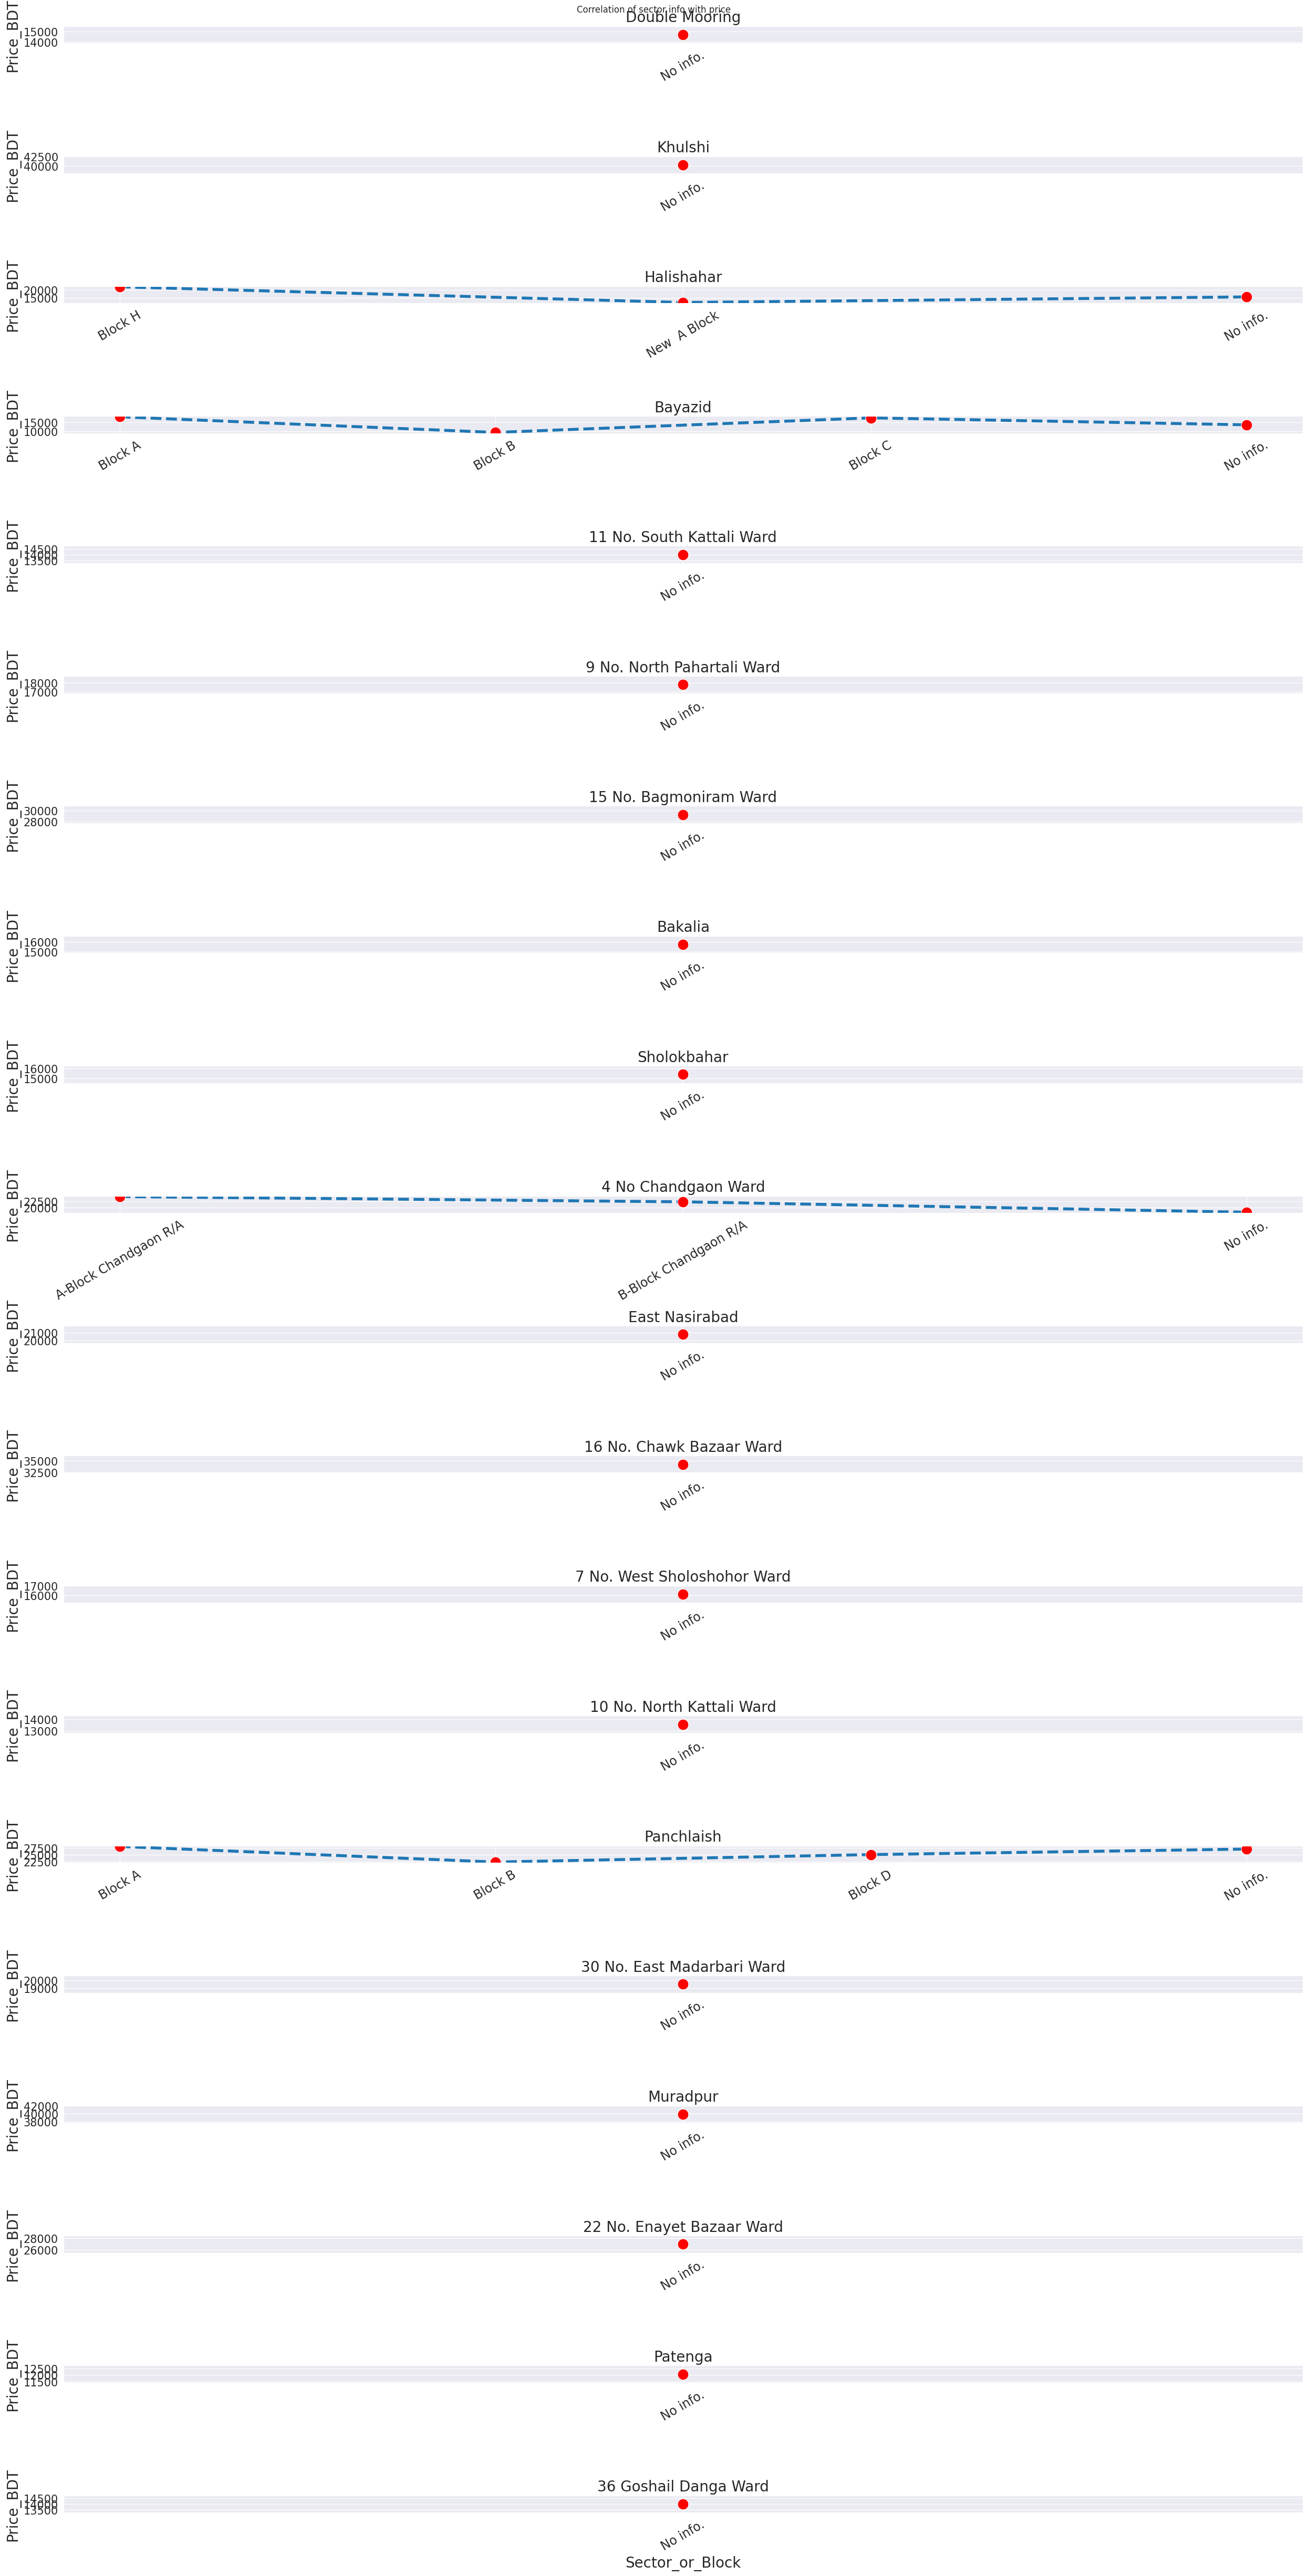

In [ ]:
with sns.axes_style('darkgrid'):
    n_rows, n_cols = (len(sector_dk), 1)
    figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(25, 50))
    figure.suptitle("Correlation of sector info with price\n\n\n")

    for i, col in enumerate(sector_dk['Town']):
        fig = sns.lineplot(
            data=pd.pivot_table(
                    data=cto[(cto['Town'] == col)],
                    index=['Town', 'sector_or_block'],
                    values='Price_BDT',
                    aggfunc='mean'
                    ).sort_values(by='sector_or_block', ascending=True).reset_index(),
                x='sector_or_block',
                y='Price_BDT',
                # size=12,
                lw=4,
                linestyle='--',
                markers=True,
                marker='o',
                markersize=15,
                markerfacecolor='red',
                ax=axes[i]
        )
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Price_BDT', fontsize=20)
        axes[i].set_title(col, fontsize=20)
        # axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=30, fontsize=17)
        axes[i].tick_params(axis='x', labelrotation=30, labelsize=17)
        # axes[i].set_yticklabels(axes[i].get_yticklabels(), fontsize=15)
        # axes[i].set_yticklabels(axes[i].get_yticks(), fontsize=15)
        axes[i].tick_params(axis='y', labelsize=15)

        # fig.set_xticklabels(fig.get_xticklabels(), rotation=90, fontsize=20)
        # fig.set_yticklabels(fig.get_yticks(), fontsize=20)
axes[i].set_xlabel('Sector_or_Block', fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
most_inexpensive_towns_dhaka = pd.pivot_table(
    data= dfc.loc[dfc['City'] == "Chattogram"],
    index='Town',
    values=['Price_BDT', 'Area_sqft', 'TotalRooms'],
    aggfunc=['mean', 'median', 'count', 'max']
).sort_values(by=('mean', 'Price_BDT'), ascending=True)

most_inexpensive_towns_dhaka

mean                             median  \
                               Area_sqft     Price_BDT TotalRooms Area_sqft   
Town                                                                          
Hathazari                     850.000000   8833.333333   3.333333     850.0   
Patenga                       788.095238  12071.428571   3.666667     750.0   
Nasirabad C and B Colony      800.000000  12500.000000   2.000000     800.0   
Uttar Kattali                 950.000000  13000.000000   4.000000     950.0   
31 No. Alkoron Ward           650.000000  13000.000000   2.000000     650.0   
Railway Colony                900.000000  13250.000000   4.000000     900.0   
10 No. North Kattali Ward     929.410256  13551.282051   4.435897     850.0   
36 Goshail Danga Ward         889.285714  14000.000000   3.785714     900.0   
11 No. South Kattali Ward    1012.993197  14011.564626   4.802721    1000.0   
Bayazid                      1039.186528  14054.404145   4.818653    1000.0   
Double Mooring               1057.976190  14686.206349   4.728571    1050.0   
29 No. West Madarbari Ward    908.333333  15166.666667   4.000000     925.0   
Sholokbahar                  1036.875000  15406.250000   4.609375    1025.0   
Halishahar                   1069.331707  15575.853659   4.629268    1050.0   
Bakalia                      1115.000000  15721.428571   5.014286    1150.0   
7 No. West Sholoshohor Ward  1119.840000  16120.000000   4.860000    1067.5   
33 No. Firingee Bazaar Ward   912.666667  16541.666667   3.916667     900.0   
32 No. Andarkilla Ward        870.000000  17200.000000   3.800000     900.0   
9 No. North Pahartali Ward   1221.402439  17810.975610   5.402439    1250.0   
Riaj Uddin Bazar              950.000000  19000.000000   4.000000     950.0   
Kotwali                      1300.000000  19000.000000   6.000000    1300.0   
Lal Khan Bazaar              1239.285714  19142.857143   5.500000    1300.0   
30 No. East Madarbari Ward   1036.538462  19500.000000   4.538462    1000.0   
Jalalabad Housing Society    1384.615385  19846.153846   6.000000    1450.0   
4 No Chandgaon Ward          1229.409836  20201.639344   5.606557    1200.0   
East Nasirabad               1205.207547  20801.886792   5.000000    1200.0   
Chattogram                   1311.111111  23777.777778   5.444444    1450.0   
Panchlaish                   1457.184211  26500.000000   5.578947    1375.0   
22 No. Enayet Bazaar Ward    1340.000000  26952.380952   5.571429    1200.0   
Kazir Dewri                  1365.000000  28450.000000   5.800000    1300.0   
15 No. Bagmoniram Ward       1597.878378  29290.540541   5.986486    1575.0   
16 No. Chawk Bazaar Ward     1732.173077  34211.538462   6.365385    1650.0   
Nasirabad                    2000.000000  35000.000000   7.000000    2000.0   
Muradpur                     1677.333333  39833.333333   5.833333    1410.0   
Jamal Khan                   1376.666667  40000.000000   6.333333    1330.0   
Khulshi                      1772.967509  40340.072202   6.411552    1600.0   

                                                     count            \
                            Price_BDT TotalRooms Area_sqft Price_BDT   
Town                                                                   
Hathazari                     10000.0          4         3         3   
Patenga                       11000.0          4        21        21   
Nasirabad C and B Colony      12500.0          2         1         1   
Uttar Kattali                 13000.0          4         2         2   
31 No. Alkoron Ward           13000.0          2         1         1   
Railway Colony                13250.0          4         2         2   
10 No. North Kattali Ward     12000.0          4        39        39   
36 Goshail Danga Ward         13000.0          4        14        14   
11 No. South Kattali Ward     13000.0          5       147       147   
Bayazid                       13000.0          5       193       193   
Double Mooring    

In [ ]:
btype = dfc[dfc['Type'] == 'Apartment']
dhaka_prices= btype[btype['City'] == 'Dhaka']['Price_BDT']
chittagong_prices = btype[btype['City'] == 'Chattogram']['Price_BDT']

In [ ]:

dhaka_indices = btype[btype['City'] == 'Dhaka'].index
chittagong_indices = btype[btype['City'] == 'Chattogram'].index


selected_dhaka_indices = np.random.choice(dhaka_indices, size=len(chittagong_indices), replace=False)


selected_indices = list(selected_dhaka_indices) + list(chittagong_indices)

lvldf = btype.loc[selected_indices]



In [ ]:

dhaka_prices= lvldf[lvldf['City'] == 'Dhaka']['Price_BDT']
chittagong_prices = lvldf[lvldf['City'] == 'Chattogram']['Price_BDT']

6193    18000.0
144     21000.0
701     60000.0
3464    30000.0
5769    19000.0
Name: Price_BDT, dtype: float64

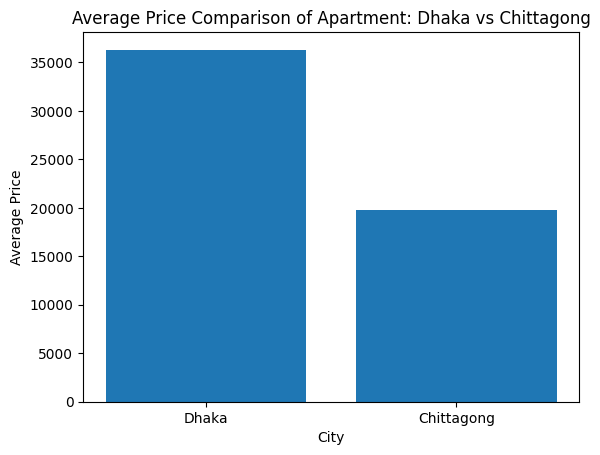

In [ ]:


avg_dhaka_price = dhaka_prices.mean()
avg_chittagong_price = chittagong_prices.mean()


cities = ['Dhaka', 'Chittagong']
average_prices = [avg_dhaka_price, avg_chittagong_price]

plt.bar(cities, average_prices)
plt.xlabel('City')
plt.ylabel('Average Price')
plt.title('Average Price Comparison of Apartment: Dhaka vs Chittagong')
plt.show()

In [ ]:
dhaka14 = dfc[(dfc['City'] == 'Dhaka') & (dfc['Area_sqft'] == 1400)]['Price_BDT']
chit14 = dfc[(dfc['City'] == 'Chattogram') & (dfc['Area_sqft'] == 1400)]['Price_BDT']
dhaka14.mean()

27867.424242424244

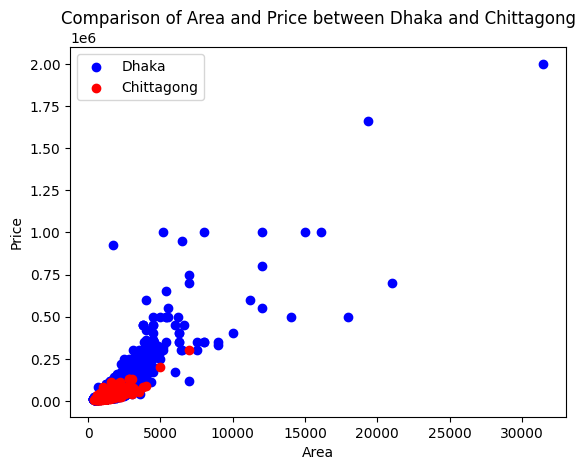

In [ ]:



dhaka_df = dfc[dfc['City'] == 'Dhaka']
chittagong_df = dfc[dfc['City'] == 'Chattogram']

plt.scatter(dhaka_df['Area_sqft'], dhaka_df['Price_BDT'], c='blue', label='Dhaka')
plt.scatter(chittagong_df['Area_sqft'], chittagong_df['Price_BDT'], c='red', label='Chittagong')

plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Comparison of Area and Price between Dhaka and Chittagong')
plt.legend()
plt.show()



In [ ]:
dhaka=btype[btype['City'] == 'Dhaka']
ctg=btype[btype['City'] == 'Chattogram']


In [ ]:
dhaka.head(5)

,Beds,Baths,Area_sqft,Type,Price_BDT,sector_or_block,Region,Town,City,TotalRooms
0,3,4,2200,Apartment,50000.0,Block A,Bashundhara R-A,Bashundhara R-A,Dhaka,7
2,3,4,1950,Apartment,30000.0,Block F,Bashundhara R-A,Bashundhara R-A,Dhaka,7
3,3,3,2000,Apartment,35000.0,Sector 9,Uttara,Uttara,Dhaka,6
4,3,4,1650,Apartment,25000.0,Block I,Bashundhara R-A,Bashundhara R-A,Dhaka,7
5,5,5,3400,Apartment,110000.0,No info.,Gulshan 1,Gulshan,Dhaka,10


480     10000.0
3958    13000.0
4247    12000.0
6375    10000.0
6801    10500.0
Name: Price_BDT, dtype: float64


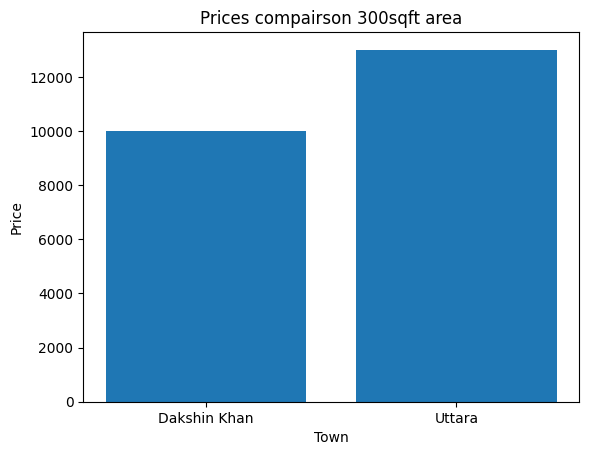

In [ ]:
filtered_dhaka = dhaka[dhaka['Area_sqft'] == 300]

print(filtered_dhaka['Price_BDT'])
# Create the plot
plt.bar(filtered_dhaka['Town'], filtered_dhaka['Price_BDT'])
plt.xlabel('Town')
plt.ylabel('Price')
plt.title('Prices compairson 300sqft area')
plt.show()

57      14500.0
137     11500.0
148     12000.0
209     12000.0
266     12000.0
         ...   
6799    11500.0
6819    10000.0
6857     9500.0
6972     9500.0
7288     9500.0
Name: Price_BDT, Length: 115, dtype: float64


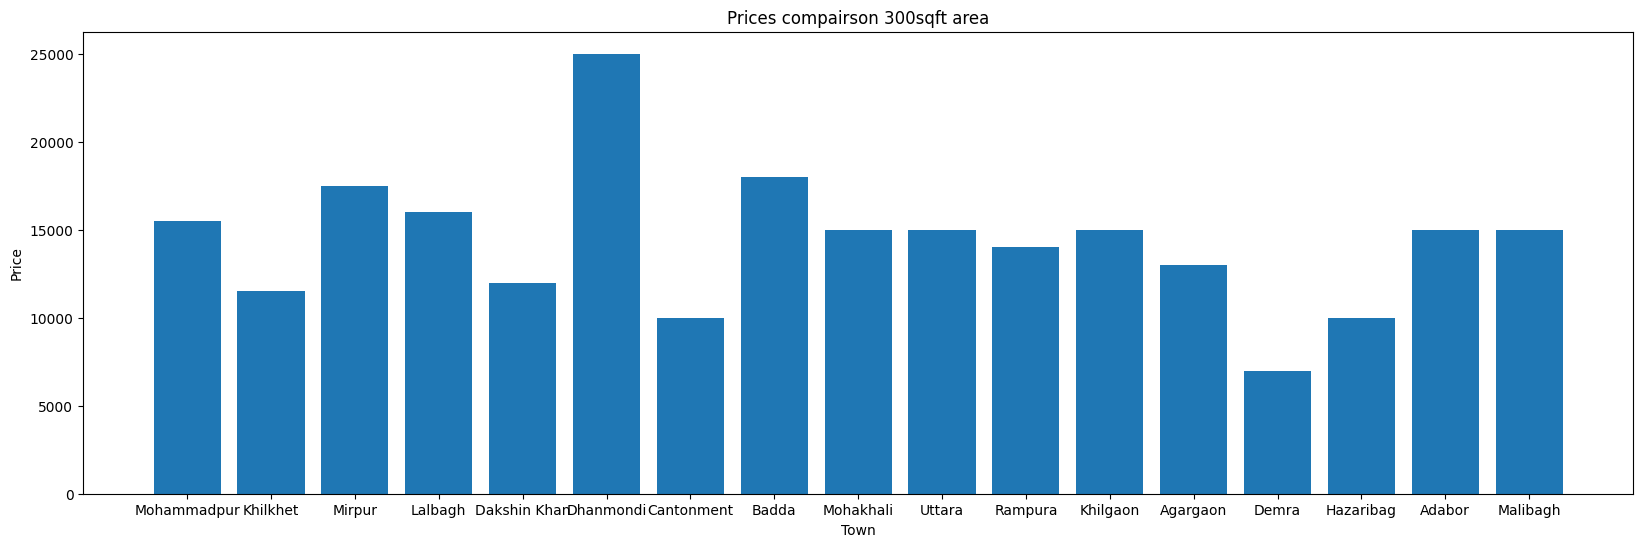

In [ ]:
filtered_dhaka = dhaka[dhaka['Area_sqft'] == 600]

print(filtered_dhaka['Price_BDT'])
# Create the plot
plt.figure(figsize=(20, 6))
plt.bar(filtered_dhaka['Town'], filtered_dhaka['Price_BDT'])

plt.xlabel('Town')
plt.ylabel('Price')
plt.title('Prices compairson 300sqft area')
plt.show()

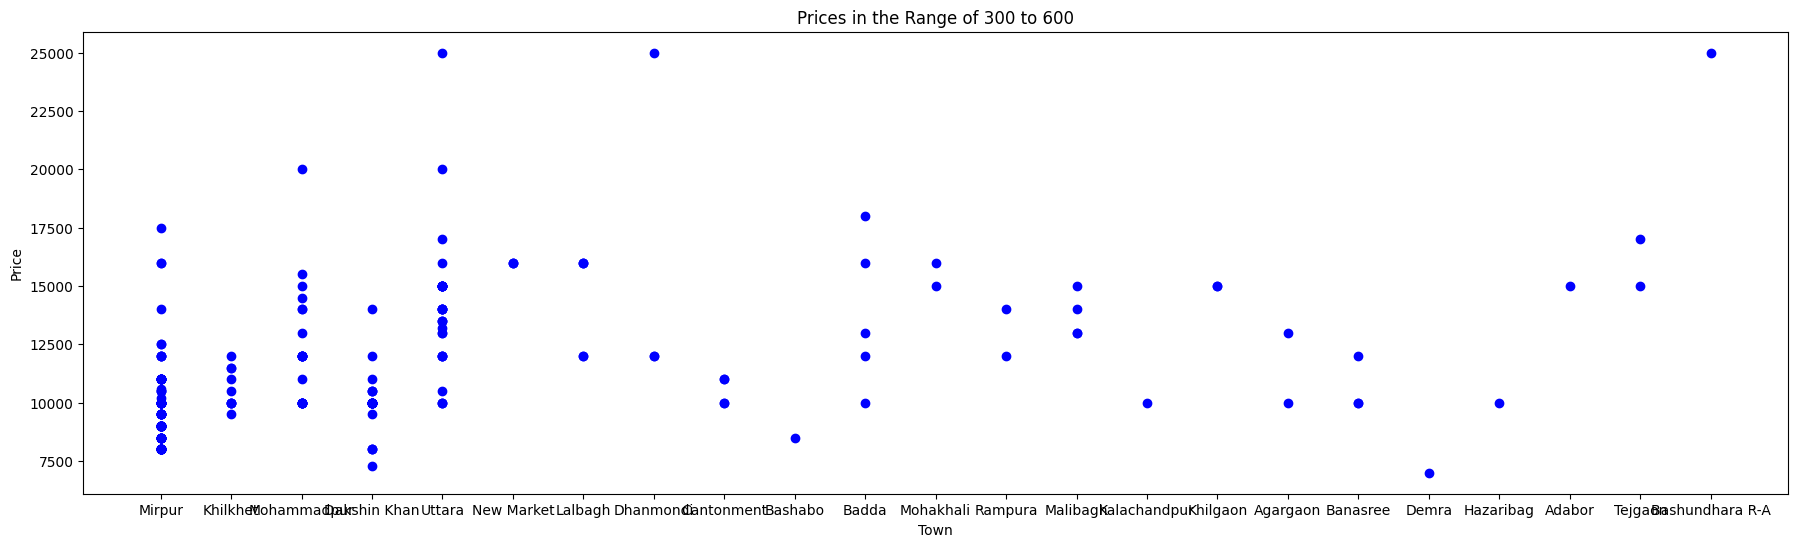

In [ ]:
filtered_dhaka = dhaka[(dhaka['Area_sqft'] >= 300) & (dhaka['Area_sqft'] <= 600)]
filtered_ctg = ctg[(ctg['Area_sqft'] >= 300) & (ctg['Area_sqft'] <= 600)]
# Create the plot
plt.figure(figsize=(22, 6))
plt.scatter(filtered_dhaka['Town'], filtered_dhaka['Price_BDT'], c='blue', label='Dhaka')
plt.xlabel('Town')
plt.ylabel('Price')
plt.title('Prices in the Range of 300 to 600')
plt.show()

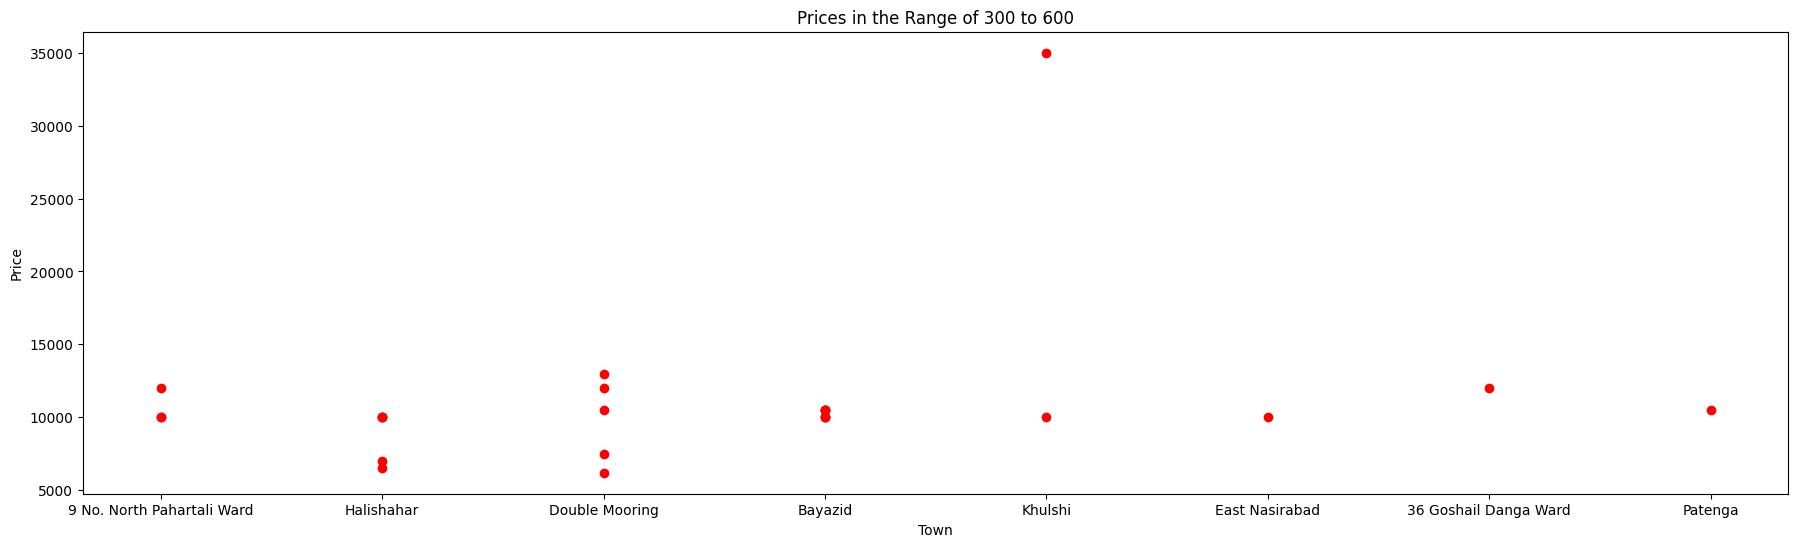

In [ ]:
plt.figure(figsize=(22, 6))
plt.scatter(filtered_ctg['Town'], filtered_ctg['Price_BDT'], c='red', label='Chittagong')
plt.xlabel('Town')
plt.ylabel('Price')
plt.title('Prices in the Range of 300 to 600')
plt.show()

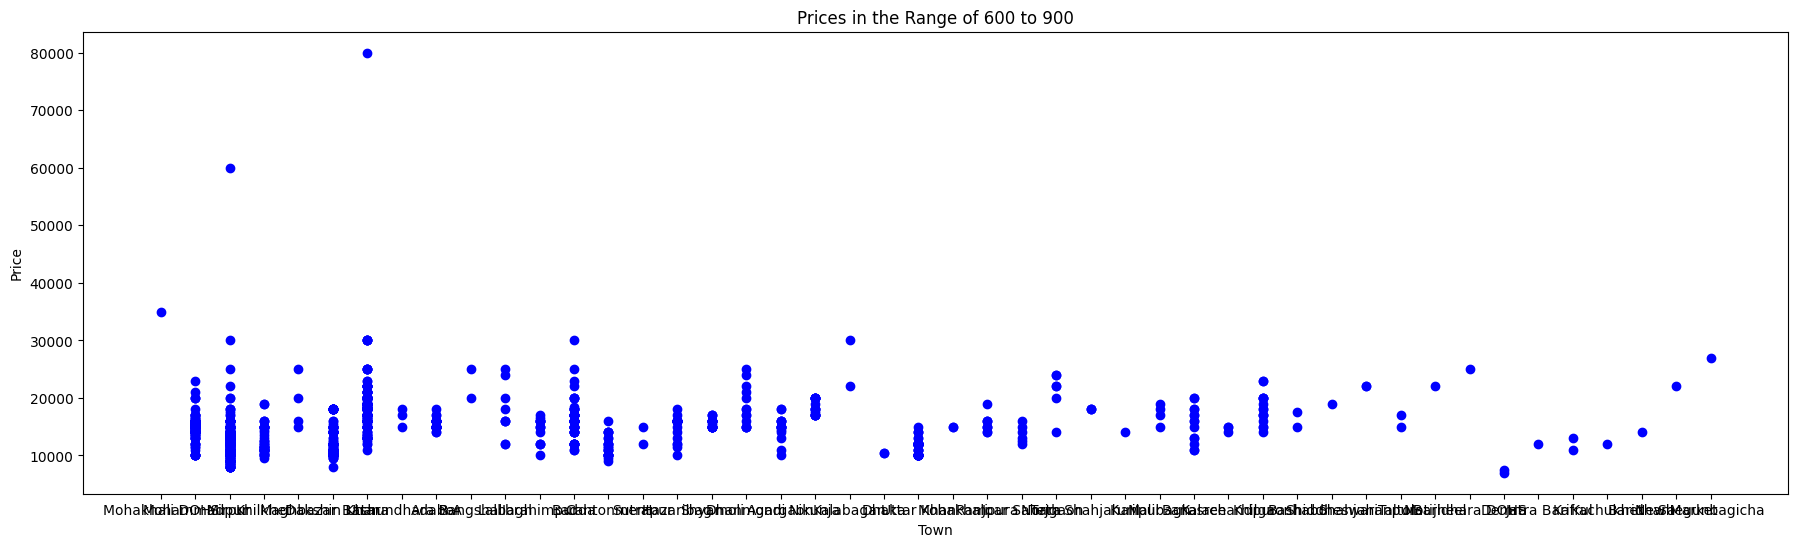

In [ ]:
filtered_dhaka = dhaka[(dhaka['Area_sqft'] >= 600) & (dhaka['Area_sqft'] <= 900)]
filtered_ctg = ctg[(ctg['Area_sqft'] >= 600) & (ctg['Area_sqft'] <= 900)]
# Create the plot
plt.figure(figsize=(22, 6))
plt.scatter(filtered_dhaka['Town'], filtered_dhaka['Price_BDT'], c='blue', label='Dhaka')
plt.xlabel('Town')
plt.ylabel('Price')
plt.title('Prices in the Range of 600 to 900')
plt.show()

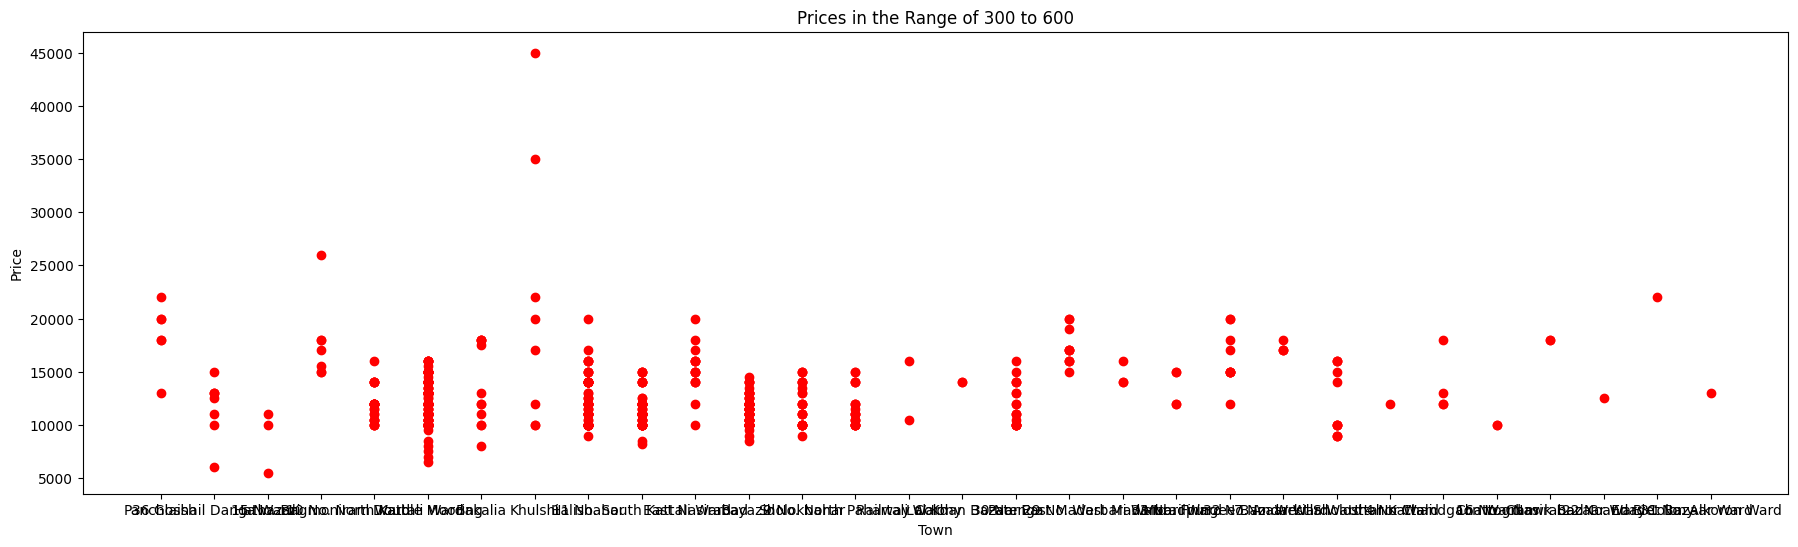

In [ ]:
plt.figure(figsize=(22, 6))
plt.scatter(filtered_ctg['Town'], filtered_ctg['Price_BDT'], c='red', label='Chittagong')
plt.xlabel('Town')
plt.ylabel('Price')
plt.title('Prices in the Range of 300 to 600')
plt.show()

In [ ]:
avg_dhaka_price

35752.966616084974

In [ ]:
avg_chittagong_price

19813.964817320702

In [ ]:
diff= avg_dhaka_price-avg_chittagong_price
percentage_diff = (diff / abs(avg_chittagong_price)) * 100
print(percentage_diff)

98.48806040445449


In [ ]:
table = pd.pivot_table(
    data=lvldf,
    index=['City'],
    values=['Price_BDT', 'Area_sqft', 'TotalRooms'],
    aggfunc=['mean', 'median', 'min', 'max']
)

table


mean                             median            \
              Area_sqft     Price_BDT TotalRooms Area_sqft Price_BDT   
City                                                                   
Chattogram  1200.412269  19813.964817   5.091114      1150   16000.0   
Dhaka       1375.206585  36355.976545   5.476319      1200   20000.0   

                            min                            max            \
           TotalRooms Area_sqft Price_BDT TotalRooms Area_sqft Price_BDT   
City                                                                       
Chattogram          5       400    5500.0          2      4000  130000.0   
Dhaka               6       300    7000.0          2      7000  924000.0   

                       
           TotalRooms  
City                   
Chattogram         10  
Dhaka              10



## Model Preparation and Testing


### Linear Regression


In [ ]:
ldfc=dfc[['Beds','Baths','Area_sqft','Type','Price_BDT','TotalRooms']]

type_mapping = {'Apartment': 1, 'Duplex': 2, 'Building': 3}
ldfc['Type'] = ldfc['Type'].map(type_mapping)


<ipython-input-13-d0ce006fdec0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ldfc['Type'] = ldfc['Type'].map(type_mapping)


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
import sklearn.metrics as skl
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score


In [ ]:
olst=smf.ols('Price_BDT~Beds+Baths+Area_sqft+TotalRooms+Type', data=ldfc).fit()
print(olst.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_BDT   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     5977.
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:03:23   Log-Likelihood:                -89045.
No. Observations:                7557   AIC:                         1.781e+05
Df Residuals:                    7552   BIC:                         1.781e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.655e+04   3473.534    -13.402      0.0

In [ ]:
x= ldfc.drop("Price_BDT", axis=1)
y= ldfc.Price_BDT

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

In [ ]:
yl=predictions = linreg.predict(x_test)
type(predictions)

numpy.ndarray

In [ ]:
print('Coefficients:', linreg.coef_)
print('Intercept:', linreg.intercept_)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
accuracy = linreg.score(x_test,y_test)
print('AccuracyII:',accuracy*100,'%')
print('R2:', r2_score(y_test, predictions))

Coefficients: [-2683.27988348 -3663.13861401    67.01953765 37928.48299221
 -6346.41849749]
Intercept: -44361.97024193532
MAE: 13570.57451593129
MSE: 948529950.8210312
RMSE: 30798.213435539263
AccuracyII: 82.33902308305532 %
R2: 0.8233902308305532


<Axes: xlabel='Price_BDT'>

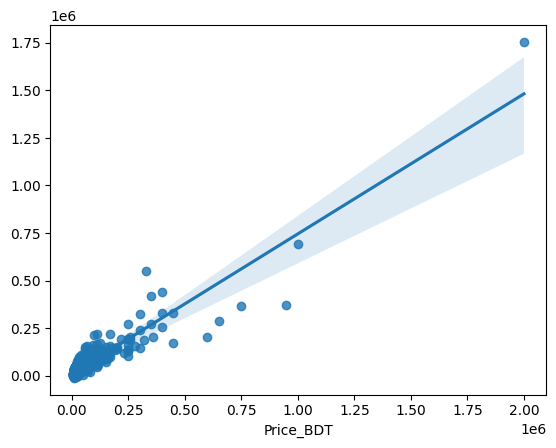

In [ ]:
sns.regplot(x=y_test, y=predictions)

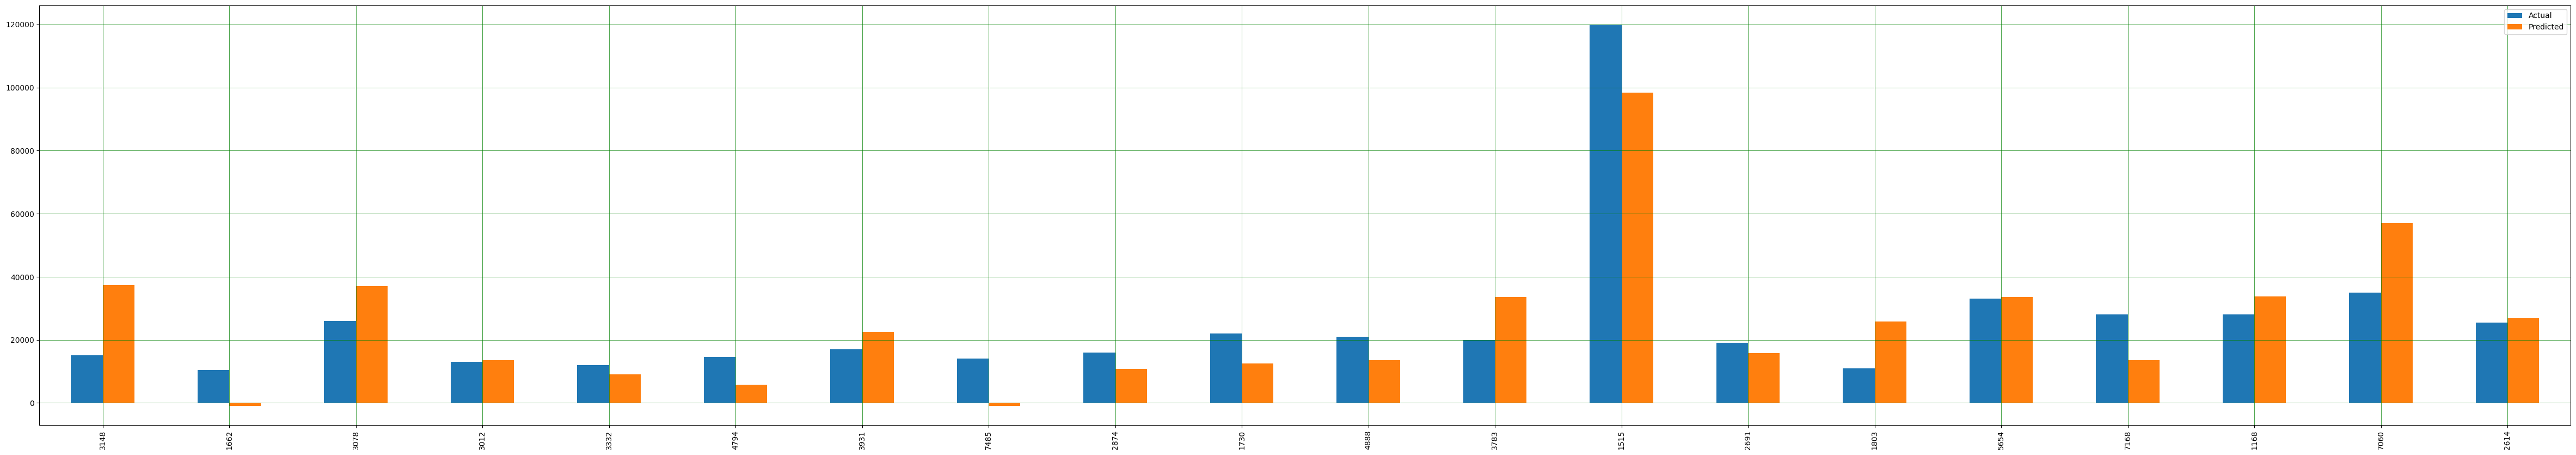

In [ ]:
df2 = pd.DataFrame({'Actual': y_test[0:20], 'Predicted': predictions[0:20]})

#actual vs predicted plot
df2.plot(kind='bar',figsize=(60,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Random Forest

In [ ]:
ddfc=dfc.copy()



In [ ]:
ddfc.head(5)

,Beds,Baths,Area_sqft,Type,Price_BDT,sector_or_block,Region,Town,City,TotalRooms
0,3,4,2200,Apartment,50000.0,Block A,Bashundhara R-A,Bashundhara R-A,Dhaka,7
1,3,4,1400,Apartment,30000.0,No info.,South Khulshi,Khulshi,Chattogram,7
2,3,4,1950,Apartment,30000.0,Block F,Bashundhara R-A,Bashundhara R-A,Dhaka,7
3,3,3,2000,Apartment,35000.0,Sector 9,Uttara,Uttara,Dhaka,6
4,3,4,1650,Apartment,25000.0,Block I,Bashundhara R-A,Bashundhara R-A,Dhaka,7


In [ ]:

from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['Type', 'sector_or_block', 'Region','sector_or_block','City','Town']

encoder = OneHotEncoder()

encoded_columns = encoder.fit_transform(ddfc[categorical_columns])

encoded_df = pd.DataFrame(encoded_columns.toarray(), columns=encoder.get_feature_names_out(categorical_columns))

dfen = pd.concat([ddfc, encoded_df], axis=1)




In [ ]:
drp=['Type','Region','Town','City','sector_or_block']
rdf=dfen.drop(drp, axis=1)
ddf=dfen.drop(drp, axis=1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
x= rdf.drop("Price_BDT", axis=1)
y= rdf.Price_BDT

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)


In [ ]:
rf_model = RandomForestRegressor()

In [ ]:
rf_model.fit(x_train, y_train)

y_predr = rf_model.predict(x_test)

In [ ]:

print(r2_score(y_test, y_predr))

0.8323262544836216


### Decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor


In [ ]:
x=ddf.drop('Price_BDT', axis=1)
y=ddf.Price_BDT

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)


In [ ]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = dt.predict(x_test)

In [ ]:

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('R2:', r2_score(y_test, y_pred))

MAE: 6657.646132315749
MSE: 683619179.1655284
RMSE: 26146.11212332588
R2: 0.8727147990132251


<Axes: xlabel='Price_BDT'>

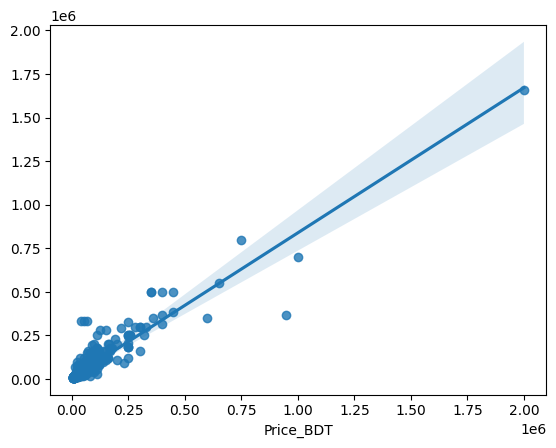

In [ ]:
sns.regplot(x=y_test, y=y_pred)

### Model Compairsion

In [ ]:
random_sample = ddf.sample(n=20, random_state=42)
random_samplelr= random_sample[['Beds','Baths','Area_sqft','Price_BDT','TotalRooms']]

In [ ]:
x=random_sample.drop("Price_BDT", axis=1)
y=random_sample.Price_BDT
xlr=random_samplelr.drop("Price_BDT", axis=1)
ylr=random_samplelr.Price_BDT

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
xlr_train, xlr_test, ylr_train, ylr_test = train_test_split(xlr, ylr, test_size=0.25, random_state=42)


In [ ]:
dt.fit(x_train,y_train)
rf_model.fit(x_train,y_train)
linreg.fit(xlr_train, ylr_train)

LinearRegression()

In [ ]:
yp1= dt.predict(x_test)
yp2= rf_model.predict(x_test)
yp3= linreg.predict(xlr_test)

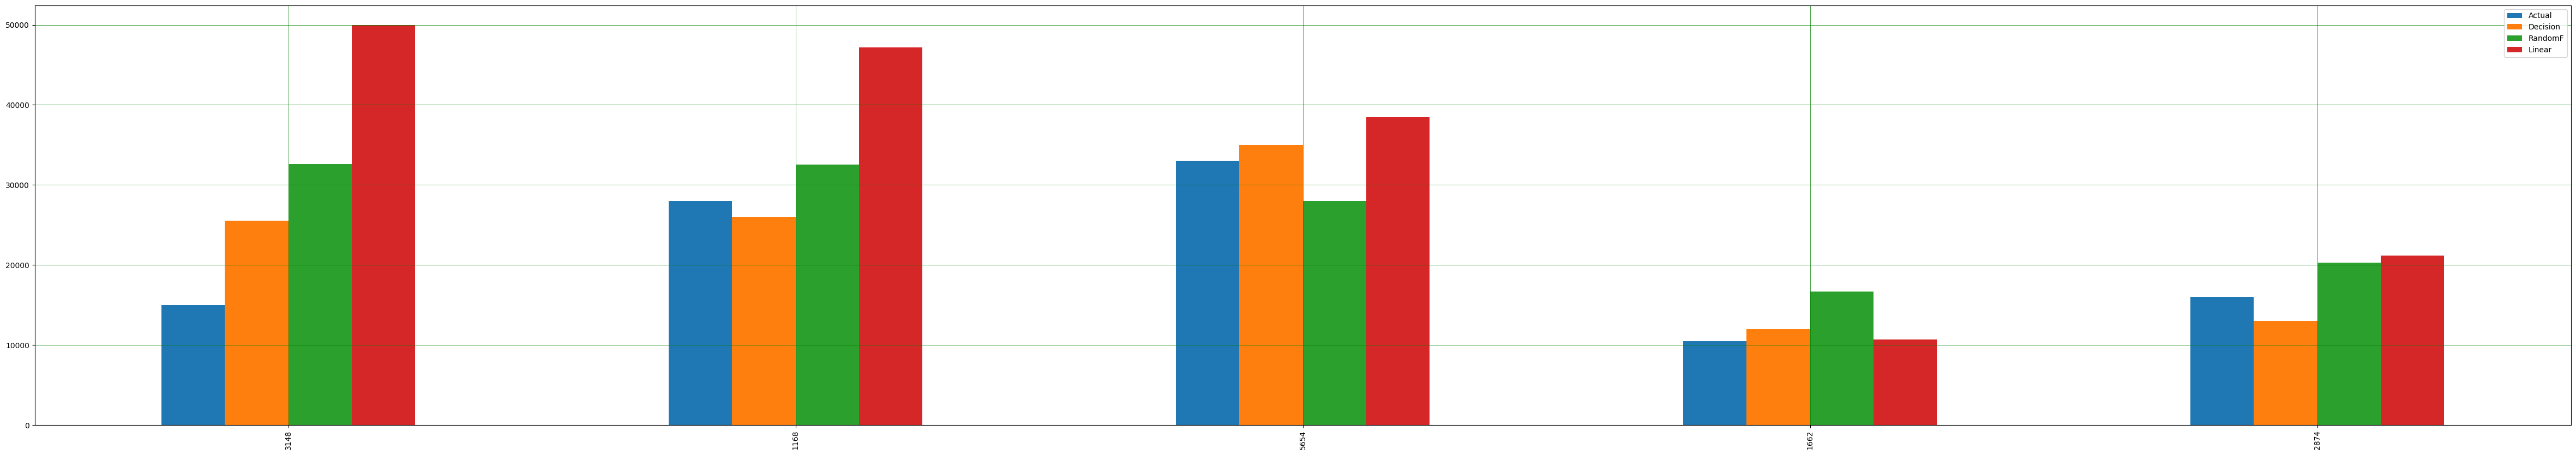

In [ ]:
`df2 = pd.DataFrame({'Actual': y_test, 'Decision': yp1,'RandomF':yp2 ,'Linear':yp3})

#actual vs predicted plot
df2.plot(kind='bar',figsize=(60,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## Prediction

Linera Regression

In [ ]:
pred=[[3,4,2200,7]]


linreg.predict(pred)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([77735.29411765])

In [ ]:
dfc.head(5)

,Beds,Baths,Area_sqft,Type,Price_BDT,sector_or_block,Region,Town,City,TotalRooms
0,3,4,2200,Apartment,50000.0,Block A,Bashundhara R-A,Bashundhara R-A,Dhaka,7
1,3,4,1400,Apartment,30000.0,No info.,South Khulshi,Khulshi,Chattogram,7
2,3,4,1950,Apartment,30000.0,Block F,Bashundhara R-A,Bashundhara R-A,Dhaka,7
3,3,3,2000,Apartment,35000.0,Sector 9,Uttara,Uttara,Dhaka,6
4,3,4,1650,Apartment,25000.0,Block I,Bashundhara R-A,Bashundhara R-A,Dhaka,7


In [ ]:

data = {'Beds': 3, 'Baths': 4, 'Area_sqft': 2200, 'Type': 'Apartment','sector_or_block':'Sector 9','Region':'Uttara','Town':'Uttara','City':'Dhaka','TotalRooms':7}
dx = pd.DataFrame(data, index=[0])

categorical_columns = ['Type', 'sector_or_block', 'Region','sector_or_block','City','Town']
encoder = OneHotEncoder()
encoded_columns = encoder.fit_transform(dx[categorical_columns])
encoded_df = pd.DataFrame(encoded_columns.toarray(), columns=encoder.get_feature_names_out(categorical_columns))

dp = pd.concat([dx, encoded_df], axis=1)

drp= ['Type', 'sector_or_block', 'Region','sector_or_block','City','Town']
dp=dp.drop(drp, axis=1)

new_row = pd.DataFrame(0, index=[0], columns=ddf.columns)

for col in dp.columns:
    if col in ddf.columns:
        new_row[col] = dp[col].values[0]


ddx = pd.concat([ddf, new_row], ignore_index=True)


Decsion tree

In [ ]:
dt.predict(ddx.tail(1).drop('Price_BDT', axis=1))

array([26000.])

In [ ]:
rf_model.predict(ddx.tail(1).drop('Price_BDT', axis=1))

array([35875.])